# Analisi dei corrispettivi dell'azienda <<Là di Cjastelan>>

## Intro

### Descrizione dei dati grezzi

I dati vanno da gennaio 2018 a maggio 2025.

Dal 2018 a maggio 2022 i dati sono stati raccolti manualmente da Riccardo Castellani, da giugno 2022 a marzo 2024 la raccolta, sempre manuale, è stata fatta da Dario Castellani, mentre da aprile 2024 a oggi viene utilizzato un Google Form per far inserire direttamente agli operatori di cassa i vari corrispettivi della giornata.

La raccolta manuale è stata fatta su diversi fogli elettronici Excel. I file prodotti da Riccardo (2018-2022) raccolgono i corrispettivi di un intero anno solare e sono composti da 12 fogli elettronici, uno per ciascun mese dell'anno. I file prodotti da Dario sono annuali per il 2022 e il 2023, divisi per trimestri per il 2024; manca il file relativo all'ultimo trimestre del 2024, essendo questo stato compilato direttamente su cloud in un GoogleDoc. L'ultimo file Excel prodotto da Dario riguarda il primo trimestre del 2025.

Il file del 2022 esiste in doppia versione, una prodotta da Riccardo e una da Dario. La versione di Riccardo verrà ignorata nell'analisi: si tratta, infatti, di una collezione parziale, mancando dell'ultimo trimestre e avendo registrazioni non complete nel trimestre estivo; il file di Dario, invece, duplica tutti i dati corretti della versione di Riccardo e completa e corregge le informazioni mancanti, oltre ad avere i dati dell'ultimo trimestre.

La struttura interna dei fogli di calcolo è simile per ciascun foglio, al netto di aggiunte di casse e reparti che sono arrivate negli anni. I dati sono organizzati in forma tabulare, divisi sulle righe per giorno e sulle colonne per reparti di IVA, raggruppati per cassa. Ai margini ha i totali complessivi e per reparto.

Nel 2018 e nel 2019, la cassa 1 ha 3 reparti: `IVA 4`, `IVA 10` e `IVA 22`, in `IVA 10` collassano i corrispettivi dei reparti 2 e 3. La cassa 2 ha, invece, 4 reparti: `IVA 4`, due `IVA 10` con lo stesso nome ma diversi, probabilmente il primo associato  al Reparto 3 e il secondo al Reparto 2, e un `IVA 22`.

Nel 2020 anche la Cassa 1 presenta una doppia colonna `IVA 10`, probabilmente la prima associata al Reparto 2 e la seconda al Reparto 3. La Cassa 2, invece, sembra invertire l'ordine di associazione dei reparti, avendo nella prima colonna `IVA 10` i corrispettivi del Reparto 2 e, nella seconda colonna `IVA 10`, i corrispettivi del Reparto 3. Dal mese di luglio compare una colonna `gelato` che corrisponde al Reparto 4. Nonostante la presenza del Reparto 4 (che ricade nell'ivaggio commerciale), nella sezione dei totali non compare la colonna `IVA 10 Comm` e i corrispettivi del Reparto 4 vengono fatti confluire nel computo dell'`IVA 10`.

Nel 2021 le colonne con l'IVA al 10% confondono continuamente il Reparto 2 col Reparto 3, da marzo a giugno tutto collassa in un solo reparto. A luglio la colonna `gelato` diventa `DESSERT` ma afferisce sempre al Reparto 4; da agosto torna a chiamarsi `gelato`.

Nel 2022 la colonna `gelato` viene rinominata `COMM` fino ad aprile, quando torna a essere `gelato`. Da settembre si aggiunge ai dati la Cassa 3, che ha inizialmente sola due colonne `IVA 4` e `IVA 10`; poiché questa cassa viene usata solo in mercati dove si vende carne, la colonna corrisponde al Reparto 2. Da novembre la colonna effettivamente prende il nome di `Reparto 2` e si aggiunge anche la colonna `Reparto 5`. A dicembre la Cassa 3 non ha più la colonna `IVA 4`.

Dal 2023 le colonne cominciano a essere intestate ai reparti e non più all'ivaggio corrispondente.

**MANCA DESCRIZIONE DEI DATI WEB**

---

## Importazione dei dati

### Dati Excel

Cominciamo selezionando solo i file che ci interessano, tra tutti quelli consegnati.
Di seguito la struttura della directory `data/raw` dove ho salvato, ed estratto, il file `corrispettivi.zip` contenente tutti i dati consegnati dall'azienda.

In [35]:
import os

DATA_DIR = os.path.join(os.getcwd(), 'data')
RAW_DIR = os.path.join(DATA_DIR, 'raw')

Per motivi di privacy, i dati non sono presenti nel repository. Per questo motivo, riportiamo una rappresentazione testuale della struttura della directory `data/raw`, in modo da poter seguire più agevolmente il processo di selezione dei file utili.

In [36]:
!tree -a {RAW_DIR}

/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw
├── Corrispettivi_web.xlsx
├── corrispettivi.zip
├── Dario
│   ├── CORRISPETTIVI_2022.xlsx
│   ├── CORRISPETTIVI_2023.xlsx
│   ├── corrispettivi 2024.xlsx
│   ├── Corrispettivi apr-mag-giu 2024.xlsx
│   ├── corrispettivi gennaio marzo 2025.xlsx
│   └── corrispettivi lug-ago-set 2024.xlsx
├── .~lock.Corrispettivi_web.xlsx#
└── Riccardo
    ├── 2019
    │   ├── corrispettivi_ago_19.pdf
    │   ├── corrispettivi_apr_19.pdf
    │   ├── corrispettivi_dic_19.pdf
    │   ├── corrispettivi_feb_19.pdf
    │   ├── corrispettivi_gen_19.pdf
    │   ├── corrispettivi_giu_19.pdf
    │   ├── corrispettivi_lug_19.pdf
    │   ├── corrispettivi_mag_19.pdf
    │   ├── corrispettivi_mar_19.pdf
    │   ├── corrispettivi_nov_19.pdf
    │   ├── corrispettivi_ott_19.pdf
    │   └── corrispettivi_set_19.pdf
    ├── 2020
    │   ├── corrispettivi_ago_2020.pdf
    │   ├── corrispettivi_apr_20.pdf
    │  

I file sono divisi in due principali subdirectory nominate in base a chi ha compilato le tabelle.

Nella subdirectory `Riccardo` sono presenti anche file `.pdf` che altro non sono che le esportazioni dei singoli fogli elettronici nei file Excel, inviati poi al commercialista. I file `288_2.pdf` e `griglia_acq.pdf` offrono una sintesi di altri dati commerciali e di fatturazione, che però non riguardano i corrispettivi ma altri atti di compravendita: probabilmente sono stati inseriti per errore. Il file `CORRISPETTIVI.xlsx` invece è un modello vuoto usato come base per la compilazione di tutti gli altri file

In sintesi, dunque, dobbiamo selezionare solo i file Excel (tutti terminanti in `.xlsx`), avendo cura di scartare i file `Riccardo/CORRISPETTIVI_2022.xlsx` e `Riccardo/CORRISPETTIVI.xlsx` che non sono informativi e i file `.~lock` di sistema.

_Nota a posteriori_: i dati grezzi raccolti sul web sono stati molto ripuliti e ho notato che molti errori erano stati tramandati sui fogli Excel già preparati a partire dai dati web. Per questo motivo, ignoriamo tutti i file Excel che vanno oltre marzo 2024 e ricostruiamo tutti i dati partendo dalla fonte primaria.

In [37]:
with os.scandir(RAW_DIR) as rd:
    data_files = []

    for fname in rd:
        if fname.is_dir():
            if fname.name == 'Dario':
                with os.scandir(fname) as dario_sub_dir:
                    data_files += [
                        f.path for f in dario_sub_dir
                            if not f.name.startswith('.')
                            and not '2025' in f.name
                            and not '-' in f.name        # escludo i due file dei trimestri 2024
                    ]
            else: # siamo in `/Riccardo`
                with os.scandir(fname) as riccardo_sub_dir:
                    data_files += [
                        f.path for f in riccardo_sub_dir
                            if f.is_file()                  # escludo le altre subdirectory
                            and '.xlsx' in f.name           # escludo i .pdf
                            and '_' in f.name               # escludo il modello vuoto
                            and not f.name.startswith('.')  # escludo i file di sistema
                            and not '2022' in f.name        # escludo il file parziale
                    ] 

for f in data_files:
    print(f)

len(data_files)

/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/corrispettivi 2024.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/CORRISPETTIVI_2022.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/CORRISPETTIVI_2023.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2018.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2019.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2020.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2021.xlsx


7

Dei più di 50 file consegnati, abbiamo ora selezionato e salvato in `data_files` i 7 file utili che dovremo importare in Pandas.

Per requisito, la forma del DataFrame finale deve rispecchiare quella del file più recente (del 2025). Usiamo allora un'indicizzazione gerarchica sulle colonne, indicizzando per cassa (dalla 1 alla 3) e specificando, per ogni cassa, gli incassi di ciascun reparto dall'1 al 4. Ci sarà infine un gruppo marginale `Totali`, diviso a sua volta in `IVA 4%`, `IVA 10%`, `IVA 10% comm.` e il totale giornaliero.

La funzione `import_data`, a cui è delegata l'importazione dei file Excel, è molto complessa: ciò dipende dal fatto che i file, e i fogli all'interno di essi, non hanno tutti esattamente la stessa struttura, ma presentano lievi irregolarità sufficienti a rendere impossibile scrivere una procedura abbastanza generale da essere chiamata su ogni file. Per questo motivo, di seguito ci si soffermerà sugli aspetti più salienti della procedura, delegando al codice e ai commenti al codice gli aspetti più puntuali.

Svolgiamo l'importazione usando il metodo `pd.read_excel()`. In questo modo possiamo sfruttare i dati direttamente nel formato con cui ci sono stati passati, senza doverli manipolare manualmente per convertirli in formati più facili da importare, come per esempio in `.csv`. Questo metodo, inoltre, ci fornisce una serie di funzionalità già pronte per poter gestire e tradurre direttamente le particolarità di come sono stati organizzati i dati nei file Excel, come per esempio la divisione in più fogli elettronici in ciascun file.

Chiamiamo `pd.read_excel()` con queste opzioni:
 - `sheet_name=None` per importare tutti i fogli elettronici di cui ciascun file è composto. Questa opzione fa in modo che il metodo non 
 ritorni un DataFrame ma un dizionario, le cui chiavi sono i nomi dei fogli di cui è composto il file e i valori sono il DataFrame importato;
 - `header=[2,3]` per usare le righe 3 e 4 del file Excel per costruire un `MultiIndex` per le colonne del DataFrame;
 - `skipfooter=1` per non importare l'ultima riga di ogni foglio che contiene i totali del mese.

_Nota_: per poter usare il metodo `pd.read_excel()` potrebbe essere necessario installare, tramite `pip`, la dipendenza opzionale `openpyxl`.

Mentre importiamo i dati, dobbiamo codificare le informazioni sul mese e sull'anno che non sono presenti nei dati, ma rispettivamente nel nome dei fogli elettronici e nel nome del file.

In [38]:
import numpy as np
import pandas as pd
from datetime import datetime
import locale

locale.setlocale(locale.LC_TIME, 'it_IT.utf8')
    
def flatten(l):
    '''
    Appiattisce una lista di liste
    '''
    return [el for subl in l for el in subl]    
    
def make_multicols():
    '''
    Crea modularmente un MultiIndex della forma:
    Data                  x Giorno, Mese, Anno, 
    Cassa 1, ..., Cassa 3 x Reparto 1, ..., Reparto 5 (in base a quante n_casse chiediamo)
    Totali                x IVA 4, IVA 10, IVA 10 comm, Tot Giornaliero


    n_casse : int
        il numero di casse registrate
    '''

    level1 = ['Data'] + [f'Cassa {n}' for n in range(1, 4)] + ['Totali']
    level2 = ['Giorno', 'Mese', 'Anno', 'Reparto 1', 'Reparto 2', 'Reparto 3', 'Reparto 4', 'Reparto 5', 'IVA 4', 'IVA 10', 'IVA 10 comm', 'Tot Giornaliero']

    level1_casse_codes = flatten([[n] * 5 for n in range(1, 4)])
    level2_casse_codes = [3, 4, 5, 6, 7] * 3
    level1_codes = [0] * 3 + level1_casse_codes + [4] * 4
    level2_codes = [0, 1, 2] + level2_casse_codes + [8, 9, 10, 11]

    return pd.MultiIndex(levels=[level1, level2], codes=[level1_codes, level2_codes])  

def import_excel_datas(excel_files):  

    def import_date(sheet, df, fname, imported):
        '''
        Compila le colonne Data di tidy in base ai dati sporchi del df che si sta importando

        sheet: chiave del dictionary di df ritornato da pd.read_excel()
        df: valore associato a sheet
        fname: nome del file che si sta importando
        '''

        imported[('Data', 'Giorno')] = df.iloc[:, 0]
        imported[('Data', 'Mese')] = sheet.lower()
        imported[('Data', 'Anno')] = int(fname.split('.')[-2][-4:])

    def import_casse(df, imported):
        '''
        Compila le colonne dei corrispettivi delle casse in tidy associando i dati del df che si sta importando da pd.read_excel()
        '''
 
        iva_rep_map = {
            'IVA 4': 'Reparto 1',        
            'IVA 10_C': 'Reparto 2',     
            'IVA 10_Y': 'Reparto 3',     
            'IVA 10 COMM': 'Reparto 4',
            'IVA 22': 'Reparto 5',
            'gelato': 'Reparto 4',
            'DESSERT': 'Reparto 4',
            'COMM': 'Reparto 4'
        }

        anno = imported[('Data', 'Anno')][0]
        mese = imported[('Data', 'Mese')][0]
        casse = [tup for tup in df.columns if 'Cassa' in tup[0].capitalize()]
        
        for cassa in casse:
            if anno == 2023 and mese == 'marzo' and cassa == ('CASSA 3', 'Rearto 5'):
                # typo nella colonna che va trovato subito
                # print(f"{mese} {cassa} -> {(cassa[0].capitalize(), 'Reparto 5')}")
                imported[(cassa[0].capitalize(), 'Reparto 5')] = df[cassa]
            
            elif not 'reparto' in cassa[1].lower():
                # se i corrispettivi non sono segnati sotto un reparto
                to_map = cassa

                if anno <= 2019:
                    # Per il 2018 e per il 2019, per la Cassa 1 mettiamo tutto in Reparto 2, successivamente in fase di analisi penseremo
                    # come gestire i dati
                    if cassa == ('CASSA 1', 'IVA 10'):
                        to_map = ('CASSA 1', 'IVA 10_C')
               
                    # Per la Cassa 2 nel 2018 e 2019 mappiamo le colonne: prima IVA 10 -> yogurt, seconda IVA 10 -> carne
                    if cassa == ('CASSA 2', 'IVA 10'):
                        to_map = ('CASSA 2', 'IVA 10_Y')
                    if cassa == ('CASSA 2', 'IVA 10 '):
                        to_map = ('CASSA 2', 'IVA 10_C')
                        
                elif anno == 2020:
                    # Cassa 1
                    # In cassa 1 compare la seconda colonna IVA 10, a volte in maiuscolo a volte in minuscolo
                    if cassa == ('CASSA 1', 'IVA 10'):
                        if mese in ['gennaio', 'febbraio', 'marzo']:
                            to_map = ('CASSA 1', 'IVA 10_C')
                        else: # da aprile in poi la prima colonna IVA è scritta in minuscolo e si sfalsa tutto:
                            to_map = ('CASSA 1', 'IVA 10_Y')
                    # se la prima colonna iva 10 è in maiuscolo, la seconda è importata come (IVA 10.1) e va in yogurt
                    elif cassa == ('CASSA 1', 'IVA 10.1'):
                        to_map = ('CASSA 1', 'IVA 10_Y')
                    elif cassa == ('CASSA 1', 'iva 10'):
                        to_map = ('CASSA 1', 'IVA 10_C')
                        
                        
                    # Cassa 2
                    elif cassa == ('CASSA 2', 'IVA 10'):
                        to_map = ('CASSA 2', 'IVA 10_C')
                    elif cassa == ('CASSA 2', 'IVA 10 '):
                        to_map = ('CASSA 2', 'IVA 10_Y')

                elif anno == 2021:
                    # Cassa 1
                    if cassa == ('CASSA 1', 'iva 10'):
                        to_map = ('CASSA 1', 'IVA 10_C')
                    elif cassa == ('CASSA 1', 'IVA 10'):
                        # manca da marzo a giugno
                        to_map = ('CASSA 1', 'IVA 10_Y')

                    # Cassa 2
                    elif cassa == ('CASSA 2', 'IVA 10'):
                        if mese in ['febbraio', 'marzo']: # colonne invertite
                            to_map = ('CASSA 2', 'IVA 10_Y')
                        else:
                            # da aprile va tutto in carne
                            to_map = ('CASSA 2', 'IVA 10_C')
                    elif cassa == ('CASSA 2', 'IVA 10 '):
                        if mese in ['febbraio', 'marzo']: # colonne invertite
                            to_map = ('CASSA 2', 'IVA 10_C')
                        else:
                            to_map = ('CASSA 2', 'IVA 10_Y')
                    
                elif anno == 2022:
                    # Cassa 1
                    if cassa == ('CASSA 1', 'iva 10'):
                        to_map = ('CASSA 1', 'IVA 10_C')
                    elif cassa == ('CASSA 1', 'IVA 10'):
                        to_map = ('CASSA 1', 'IVA 10_Y')

                    # Cassa 2
                    elif cassa == ('CASSA 2', 'IVA 10'):
                        to_map = ('CASSA 2', 'IVA 10_C')
                    elif cassa == ('CASSA 2', 'IVA 10 '):
                        to_map = ('CASSA 2', 'IVA 10_Y')

                    # Cassa 3
                    elif cassa == ('CASSA 3', 'IVA 10'): 
                        to_map = ('CASSA 3', 'IVA 10_C')
                        
                # print(f"{mese} {cassa}->{to_map[0].capitalize(), iva_rep_map[to_map[1]]}")
                imported[(to_map[0].capitalize(), iva_rep_map[to_map[1]])] = df[cassa]
                
            else: # Se sono segnati già sotto il reparto corretto
                # print(f"{mese} {cassa}->{cassa[0].capitalize(), cassa[1]} [else]")
                imported[(cassa[0].capitalize(), cassa[1])] = df[cassa]

    def import_tot(df, imported):
        '''
        Compila le colonne dei totali dei corrispettivi in tidy associando i dati del df che si sta importando da pd.read_excel()
        '''
        tot_map = {
            'CORRISPETTIVI': 'Totali',
            'TOTALE': 'Tot Giornaliero',
            'IVA 10 commerciale': 'IVA 10 comm'
        }

        # Controllo se la prima multicolonna si chiama 'CORRISPETTIVI' invece che 'Totali'
        if 'CORRISPETTIVI' in df.columns.get_level_values(0):
            tots = [tup for tup in df.columns if 'CORRISPETTIVI' in tup[0]]
            for tot in tots:
                mapped = (tot_map[tot[0]], tot[1] if tot[1] not in tot_map.keys() else tot_map[tot[1]])
                imported[mapped] = df[tot]
        else:
            tots = [tup for tup in df.columns if 'Totali' in tup[0].capitalize()]
            for tot in tots:
                imported[(tot[0].capitalize(), tot[1])] = df[tot]
            
            
    '''
    Main Routine
    '''
    
    # creo il DataFrame da restituire come risultato
    res = pd.DataFrame(columns=make_multicols())
    
    for f in excel_files:
        print(f'leggo {f}')
        
        df_dict = None
        if 'apr' in f or 'lug' in f or '2025' in f:
            # i due file a trimestri non hanno le due righe di titolo
            df_dict = pd.read_excel(f, sheet_name=None, header=[0, 1], skipfooter=1)
        else:
            df_dict = pd.read_excel(f, sheet_name=None, header=[2, 3], skipfooter=1)
        
        if '2020' in f:
            # Nel file del 2020, in alcuni fogli, le righe marginali da saltare sono 2
            for key, df in df_dict.items():
                if key in ['febbraio', 'marzo']:
                    df.drop(31, inplace=True)
        elif '2021' in f:
            # Nel file del 2021 c'è un foglio aggiuntivo finale con tutti i totali dell'anno, non ci interessa
            del df_dict['Foglio1']

        elif '2024' in f and 'Foglio4' in df_dict.keys():
            # Nel file 'corrispettivi 2024' c'è un Foglio4 vuoto
            del df_dict['Foglio4']
        
        for sheet, df in df_dict.items():
            df.fillna(0, inplace=True)

            if 'apr' in f:
                # il file del secondo trimestre del 2024 ha la formattazione dell'intestazione delle colonne sballata
                df = pd.DataFrame(df.values, columns=make_multicols().drop([('Data', 'Mese'), ('Data', 'Anno')]))
                
            # creo un DataFrame ben formattato dove copiare i dati importati da poter poi concatenare al risultato
            imported = pd.DataFrame(columns=make_multicols())
            
            import_date(sheet, df, f, imported)
            import_casse(df, imported)
            import_tot(df, imported)

            res = pd.concat([res, imported], ignore_index=True)

    # Sistemiamo i tipi delle date
    res['Data', 'Giorno'] = res['Data', 'Giorno'].astype('int32')
    res['Data', 'Mese'] = res['Data', 'Mese'].astype(pd.StringDtype())
    res['Data', 'Anno'] = res['Data', 'Anno'].astype('int32')

    # riordiniamo le ultime due colonne scambiate
    sorted_cols = list(res.columns)
    sorted_cols[-2], sorted_cols[-1] = sorted_cols[-1], sorted_cols[-2]
    res = res[sorted_cols]
    return res

imported_excels_df = import_excel_datas(data_files)

display(imported_excels_df)
print(imported_excels_df.dtypes)

leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/corrispettivi 2024.xlsx
leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/CORRISPETTIVI_2022.xlsx


/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/CORRISPETTIVI_2023.xlsx


/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2018.xlsx


/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2019.xlsx


/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2020.xlsx


/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2021.xlsx


/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_35340/412338662.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

Data                   Cassa 1                                          \
     Giorno      Mese  Anno Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5   
0         1   gennaio  2024      0.00      0.00       0.0      0.00       0.0   
1         2   gennaio  2024      0.00      0.00       0.0      0.00       0.0   
2         3   gennaio  2024      0.00      0.00       0.0      0.00       0.0   
3         4   gennaio  2024    137.60     32.30       0.0      0.00     100.0   
4         5   gennaio  2024      0.00      0.00       0.0      0.00       0.0   
...     ...       ...   ...       ...       ...       ...       ...       ...   
2320     27  dicembre  2021    112.76     16.90       2.0     82.90       0.0   
2321     28  dicembre  2021     67.06      0.00       8.0     28.40       0.0   
2322     29  dicembre  2021    350.37     13.72       6.0     15.20       0.0   
2323     30  dicembre  2021    185.86     29.23      16.5     11.00       0.0   
2324     31  dicembre  2021    183.13     28.90       9.8     45.03       0.0   

       Cassa 2            ...   Cassa 3                                \
     Reparto 1 Reparto 2  ... Reparto 1 Reparto 2 Reparto 3 Reparto 4   
0         0.00      0.00  ...       NaN       0.0       NaN       NaN   
1         0.00      0.00  ...       NaN       0.0       NaN       NaN   
2         0.00      0.00  ...       NaN       0.0       NaN       NaN   
3       246.13    112.92  ...       NaN       0.0       NaN       NaN   
4         0.00      0.00  ...       NaN       0.0       NaN       NaN   
...        ...       ...  ...       ...       ...       ...       ...   
2320      0.00      0.00  ...       NaN       NaN       NaN       NaN   
2321    135.60    102.15  ...       NaN       NaN       NaN       NaN   
2322     94.20     12.80  ...       NaN       NaN       NaN       NaN   
2323      0.00      0.00  ...       NaN       NaN       NaN       NaN   
2324      0.00      0.00  ...       NaN       NaN       NaN       NaN   

                Totali                                             
     Reparto 5   IVA 4  IVA 10 IVA 10 comm IVA 22 Tot Giornaliero  
0          0.0    0.00    0.00        0.00    NaN            0.00  
1          0.0    0.00    0.00        0.00    NaN            0.00  
2          0.0    0.00    0.00        0.00    NaN            0.00  
3          0.0  483.73  145.22      159.08    NaN          788.03  
4          0.0    0.00    0.00        0.00    NaN            0.00  
...        ...     ...     ...         ...    ...             ...  
2320       NaN  112.76  101.80         NaN    0.0          214.56  
2321       NaN  202.66  138.55         NaN    0.0          341.21  
2322       NaN  444.57   47.72         NaN    0.0          492.29  
2323       NaN  185.86   56.73         NaN    0.0          242.59  
2324       NaN  183.13   83.73         NaN    0.0          266.86  

[2325 rows x 23 columns]

Data     Giorno                      int32
         Mese               string[python]
         Anno                        int32
Cassa 1  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 2  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 3  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                  object
         Reparto 4                  object
         Reparto 5                 float64
Totali   IVA 4                     float64
         IVA 10                    float64
         IVA 10 comm               float64
         IVA 22                    float64
         Tot Giornaliero           float64
dtype: obje

Per comodità salviamo il DataFrame con tutti i dati importati in un pickle

In [39]:
if 'imported_excel.pickle' not in os.listdir(DATA_DIR):
    imported_excels_df.to_pickle(os.path.join(DATA_DIR, 'imported_excel.pickle'))

### Dati dal web

I dati registrati nei fogli Excel non sono completi: mancano i corrispettivi dell'ultimo trimestre del 2024 e aprile e maggio del 2025. Raccogliamo questi dati dal foglio risposte del Google Form:

In [40]:
web_f = os.path.join(RAW_DIR, 'Corrispettivi_web.xlsx')
web_df = pd.read_excel(web_f, parse_dates=False)

with pd.option_context('display.max_columns', None, 'display.min_rows', 20): 
    display(web_df)
print(web_df.dtypes)

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale
0,2024-04-04 09:13:00.292,2024-04-02 00:00:00,Cassa 2,Centro - Martedì,173.43,116.9,46.00,3.3,7.23,NaN,173.43
1,2024-04-04 10:57:09.637,2024-04-02 00:00:00,Cassa 1,Passons - Martedì,227.38,150.97,14.07,20.6,41.74,NaN,227.38
2,2024-04-04 11:03:20.802,2024-04-03 00:00:00,Cassa 1,Villaggio - Mercoledì,174.58,108.81,15.94,17.4,32.43,NaN,174.58
3,2024-04-04 12:07:19.551,2024-04-04 00:00:00,Cassa 1,S. Osvaldo - Giovedì,285.38,170.63,47.62,18.9,48.23,NaN,285.38
4,2024-04-04 13:20:35.190,2024-04-04 00:00:00,Cassa 2,Centro - Giovedì,134.25,115.47,NaN,7.0,11.78,NaN,134.25
5,2024-04-06 12:10:20.301,2024-04-06 00:00:00,Cassa 1,Cormor - Sabato,425.68,226.78,75.64,13.2,110.06,NaN,425.68
6,2024-04-06 13:53:06.163,2024-04-06 00:00:00,Cassa 2,Centro - Sabato,516.17,342.48,120.99,19.1,33.6,NaN,516.17
7,2024-04-08 12:37:22.130,4/8/0024,Cassa 2,Centro - Lunedì,124.3,84.93,10.20,8.8,20.33,NaN,124.26
8,2024-04-09 17:08:03.532,4/9/0024,Cassa 2,Passons - Martedì,371.91,294.25,22.06,48.8,6.8,NaN,371.91
9,2024-04-10 14:29:20.024,4/10/0024,Cassa 2,Villaggio - Mercoledì,446.6,267.47,97.73,17.0,64.4,NaN,446.60


Informazioni cronologiche                            datetime64[ns]
A che giorno corrisponde questo corrispettivo?               object
Che cassa hai usato?                                         object
A quale mercato corrisponde questo corrispettivo?            object
Totale Giornaliero                                           object
Reparto 1                                                    object
Reparto 2                                                   float64
Reparto 3                                                   float64
Reparto 4                                                    object
Reparto 5                                                   float64
Totale                                                      float64
dtype: object


L'ultima colonna del foglio, di nome `Totale`, è una colonna di controllo.

Ci sono dei problemi:
- scontrini duplicati, cioè inseriti più di una volta
- tipo di `Reparto 1` e `Reparto 4` non numerico
- date scritte in modo sbagliato
- date incoerenti:
    - scontrini "del futuro", cioè la data inserita manualmente è successiva al momento dell'inserimento
    - scontrini battuti in giorni in cui non c'è il mercato a cui si riferiscono, nel senso che un corrispettivo di un mercato di un lunedì viene datato a un mercoledì, per esempio (ma potrebbe essere perché è stato spostato il mercato)
- vincolo di integrità: cassa-mercato è chiave, non può esserci un mercato che nella stessa data ha due casse
- totale disallineato con la colonna di controllo

Prima di importare, cerchiamo di pulire un po' i dati.

In [41]:
# Buttiamo via le righe vuote
web_df['Totale'] = web_df['Totale'].map(lambda x: np.nan if x == 0 else x)
web_df = web_df.dropna(how='all')
display(web_df)

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale
0,2024-04-04 09:13:00.292,2024-04-02 00:00:00,Cassa 2,Centro - Martedì,173.43,116.9,46.00,3.30,7.23,NaN,173.43
1,2024-04-04 10:57:09.637,2024-04-02 00:00:00,Cassa 1,Passons - Martedì,227.38,150.97,14.07,20.60,41.74,NaN,227.38
2,2024-04-04 11:03:20.802,2024-04-03 00:00:00,Cassa 1,Villaggio - Mercoledì,174.58,108.81,15.94,17.40,32.43,NaN,174.58
3,2024-04-04 12:07:19.551,2024-04-04 00:00:00,Cassa 1,S. Osvaldo - Giovedì,285.38,170.63,47.62,18.90,48.23,NaN,285.38
4,2024-04-04 13:20:35.190,2024-04-04 00:00:00,Cassa 2,Centro - Giovedì,134.25,115.47,NaN,7.00,11.78,NaN,134.25
...,...,...,...,...,...,...,...,...,...,...,...
456,2025-06-05 10:01:37.879,5/12/0025,Cassa 1,Centro - Lunedì,76.38,58.38,15.00,NaN,3,NaN,NaN
457,2025-06-05 12:43:25.206,2025-06-05 00:00:00,Cassa 2,Centro - Giovedì,180.53,121.19,37.64,7.90,13.8,NaN,NaN
458,2025-06-07 12:47:43.467,2025-06-07 00:00:00,Cassa 2,Centro - Sabato,394.75,302.22,30.88,37.25,24.4,NaN,NaN
459,2025-06-10 12:15:20.788,5/10/0025,Cassa 2,Passons - Martedì,235.89,132.22,31.57,32.40,39.7,NaN,NaN


In [42]:
# controlliamo se ci sono duplicati (controlliamo solo i reparti)
web_df[ web_df.duplicated(subset=[col for col in web_df.columns if 'Reparto' in col], keep=False) ] # keep=False ci ritorna tutti i duplicati, invece che solo il primo o solo l'ultimo

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale
8,2024-04-09 17:08:03.532,4/9/0024,Cassa 2,Passons - Martedì,371.91,294.25,22.06,48.80,6.8,NaN,371.91
17,2024-04-18 10:27:54.758,2024-04-09 00:00:00,Cassa 1,Centro - Martedì,371.91,294.25,22.06,48.80,6.8,NaN,371.91
50,2024-05-20 12:45:10.251,5/20/0024,Cassa 1,Centro - Lunedì,455.46,213.66,119.20,7.80,114.8,NaN,455.46
52,2024-05-22 11:58:41.422,5/20/0024,Cassa 1,Centro - Lunedì,455.46,213.66,119.20,7.80,114.8,NaN,455.46
205,2024-10-20 18:58:47.321,11/20/0024,Cassa 3,San Pietro,646.67,388.35,205.66,19.40,NaN,33.26,646.67
225,2024-11-02 13:32:54.265,2024-11-02 00:00:00,Cassa 1,Cormor - Sabato,660.71,357.09,295.27,8.35,NaN,NaN,660.71
229,2024-11-16 13:43:43.693,2024-11-16 00:00:00,Cassa 3,Coperto - Sabato,759.6,NaN,759.60,NaN,NaN,NaN,759.60
261,2024-12-28 11:24:29.542,10/20/0024,Cassa 3,San Pietri,646.67,388.35,205.66,19.40,NaN,33.26,646.67
263,2024-12-28 11:29:39.396,11/2/0024,Cassa 1,Cormor - Sabato,660.71,357.09,295.27,8.35,NaN,NaN,660.71
282,2024-12-30 09:52:07.591,11/16/0024,Cassa 1,Cormor - Sabato,759.6,NaN,759.60,NaN,NaN,NaN,759.60


In [43]:
# eliminiamo i due duplicati

# tra l'8 e il 17, probabilmente è il 17 è sbagliato, ma non c'è un'altra entrata per Passons, quindi lasciamo così anche se il dato è chiaramente falso
# il 50 è duplicato col 52, teniamo il primo
# 205, 261 e 283 sono duplicati dello stesso scontrino, teniamo solo il 283
# 225 e 263 sono duplicati, teniamo il primo
# il 282 è lo scontrino 229 inserito per sbaglio in un altro mercato, va eliminato
# il 323 è compilato male, purtroppo non ci sono altre entry che possono aiutarci a capire qual è il problema. Spostiamo il totale in Reparto 2 e teniamo così
# 380 è duplicato col 383, teniamo il primo
# il 401 è duplicato col 411, teniamo il primo
# 452 è inserito per errore ed è associato con l'entry 419 non in elenco, quindi eliminiamo
web_df.loc[323, 'Reparto 2'] = web_df.loc[323, 'Totale Giornaliero']
web_df.drop(index=[52, 205, 261, 263, 282, 383, 411, 452], inplace=True)

print('entry 323 corretta:')
display(web_df.loc[323])

print('Ci sono ancora duplicati?')
web_df[ web_df.duplicated(subset=[col for col in web_df.columns if 'Reparto' in col], keep=False) ]

entry 323 corretta:


Informazioni cronologiche                            2025-02-17 17:44:02.174000
A che giorno corrisponde questo corrispettivo?                        2/15/0025
Che cassa hai usato?                                                    Cassa 3
A quale mercato corrisponde questo corrispettivo?              Coperto - Sabato
Totale Giornaliero                                                        863.3
Reparto 1                                                                   NaN
Reparto 2                                                                 863.3
Reparto 3                                                                   NaN
Reparto 4                                                                   NaN
Reparto 5                                                                   NaN
Totale                                                                      NaN
Name: 323, dtype: object

Ci sono ancora duplicati?


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale
8,2024-04-09 17:08:03.532,4/9/0024,Cassa 2,Passons - Martedì,371.91,294.25,22.06,48.8,6.8,NaN,371.91
17,2024-04-18 10:27:54.758,2024-04-09 00:00:00,Cassa 1,Centro - Martedì,371.91,294.25,22.06,48.8,6.8,NaN,371.91


In [44]:
# controlliamo i reparti 1 e 4
print('Errori nel Reparto 1:')
display(web_df[ ~web_df['Reparto 1'].apply(np.isreal) ])

print('Errori nel Reparto 4:')
display(web_df[ ~web_df['Reparto 4'].apply(np.isreal) ])

Errori nel Reparto 1:


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale
157,2024-08-28 08:36:02.805,8/24/0024,Cassa 1,Cormor - Sabato,317.27,"205 ,07",48.15,12.1,6.95,NaN,67.2


Errori nel Reparto 4:


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale
158,2024-08-28 08:44:42.890,8/26/0024,Cassa 1,Centro - Lunedì,154.19,99.29,21.15,7.8,25 60,NaN,128.24


In [45]:
# Correggiamo i dati

web_df.loc[157, 'Reparto 1'] = 250.07 # è 250.07 e non 205.07, lo si vede sottraendo gli altri reparti dal totale giornaliero
web_df.loc[158, 'Reparto 4'] = 25.95 # stesso motivo di su
web_df = web_df.astype({'Reparto 1': 'float64', 'Reparto 4': 'float64'})

display(web_df.loc[[157, 158], :])
web_df.dtypes

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale
157,2024-08-28 08:36:02.805,8/24/0024,Cassa 1,Cormor - Sabato,317.27,250.07,48.15,12.1,6.95,NaN,67.20
158,2024-08-28 08:44:42.890,8/26/0024,Cassa 1,Centro - Lunedì,154.19,99.29,21.15,7.8,25.95,NaN,128.24


Informazioni cronologiche                            datetime64[ns]
A che giorno corrisponde questo corrispettivo?               object
Che cassa hai usato?                                         object
A quale mercato corrisponde questo corrispettivo?            object
Totale Giornaliero                                           object
Reparto 1                                                   float64
Reparto 2                                                   float64
Reparto 3                                                   float64
Reparto 4                                                   float64
Reparto 5                                                   float64
Totale                                                      float64
dtype: object

In [46]:
# Sistemiamo le date nella seconda colonna
def formatta_data(strd):
    if type(strd) is str:
        # la data è nella forma m/d/00yy
        splitted = strd.split('/')
        m = splitted[0]
        d = splitted[1]
        y = f"20{splitted[2][-2:]}"
        return f"{y}-{m}-{d}"
    else:
        return datetime.strftime(strd, '%Y-%m-%d')

web_df['Data'] = web_df.iloc[:,1].map(formatta_data)
web_df['Data'] = pd.to_datetime(web_df['Data'], format='%Y-%m-%d')

with pd.option_context('display.max_columns', None, 'display.min_rows', 20): 
    display(web_df)
print(web_df.dtypes)

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data
0,2024-04-04 09:13:00.292,2024-04-02 00:00:00,Cassa 2,Centro - Martedì,173.43,116.90,46.00,3.30,7.23,NaN,173.43,2024-04-02
1,2024-04-04 10:57:09.637,2024-04-02 00:00:00,Cassa 1,Passons - Martedì,227.38,150.97,14.07,20.60,41.74,NaN,227.38,2024-04-02
2,2024-04-04 11:03:20.802,2024-04-03 00:00:00,Cassa 1,Villaggio - Mercoledì,174.58,108.81,15.94,17.40,32.43,NaN,174.58,2024-04-03
3,2024-04-04 12:07:19.551,2024-04-04 00:00:00,Cassa 1,S. Osvaldo - Giovedì,285.38,170.63,47.62,18.90,48.23,NaN,285.38,2024-04-04
4,2024-04-04 13:20:35.190,2024-04-04 00:00:00,Cassa 2,Centro - Giovedì,134.25,115.47,NaN,7.00,11.78,NaN,134.25,2024-04-04
5,2024-04-06 12:10:20.301,2024-04-06 00:00:00,Cassa 1,Cormor - Sabato,425.68,226.78,75.64,13.20,110.06,NaN,425.68,2024-04-06
6,2024-04-06 13:53:06.163,2024-04-06 00:00:00,Cassa 2,Centro - Sabato,516.17,342.48,120.99,19.10,33.60,NaN,516.17,2024-04-06
7,2024-04-08 12:37:22.130,4/8/0024,Cassa 2,Centro - Lunedì,124.3,84.93,10.20,8.80,20.33,NaN,124.26,2024-04-08
8,2024-04-09 17:08:03.532,4/9/0024,Cassa 2,Passons - Martedì,371.91,294.25,22.06,48.80,6.80,NaN,371.91,2024-04-09
9,2024-04-10 14:29:20.024,4/10/0024,Cassa 2,Villaggio - Mercoledì,446.6,267.47,97.73,17.00,64.40,NaN,446.60,2024-04-10


Informazioni cronologiche                            datetime64[ns]
A che giorno corrisponde questo corrispettivo?               object
Che cassa hai usato?                                         object
A quale mercato corrisponde questo corrispettivo?            object
Totale Giornaliero                                           object
Reparto 1                                                   float64
Reparto 2                                                   float64
Reparto 3                                                   float64
Reparto 4                                                   float64
Reparto 5                                                   float64
Totale                                                      float64
Data                                                 datetime64[ns]
dtype: object


In [47]:
# Cerchiamo le entry in cui è stato inserito uno "scontrino del futuro" (data sbagliata)
web_df[ web_df['Data'] > web_df['Informazioni cronologiche']]

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data
42,2024-05-11 12:23:00.119,5/11/0025,Cassa 1,Cormor - Sabato,776.09,500.66,165.11,29.4,80.92,NaN,776.09,2025-05-11
71,2024-06-06 12:03:54.391,6/5/0025,Cassa 1,Villaggio - Mercoledì,307.83,255.53,31.90,6.6,13.80,NaN,307.83,2025-06-05
146,2024-08-20 10:39:23.704,9/10/0024,Cassa 1,Coperto - Sabato,256.42,230.62,NaN,6.6,19.20,NaN,256.42,2024-09-10
191,2024-10-03 10:28:40.672,11/2/0024,Cassa 1,Villaggio - Mercoledì,224.92,179.57,18.75,7.3,19.30,NaN,224.92,2024-11-02
325,2025-02-18 10:51:58.658,2/13/0026,Cassa 1,S. Osvaldo - Giovedì,276.35,89.76,150.89,35.7,NaN,NaN,276.35,2026-02-13
340,2025-02-20 09:09:43.884,2/19/0026,Cassa 1,Villaggio - Mercoledì,288.72,168.45,68.17,9.9,42.20,NaN,288.72,2026-02-19
344,2025-02-26 10:46:56.727,2/25/0026,Cassa 2,Passons - Martedì,527.94,376.21,105.13,41.6,5.00,NaN,527.94,2026-02-25


In [48]:
# Correggiamo le entry

web_df.loc[42, 'Data'] = pd.to_datetime('2024-05-11')
web_df.loc[71, 'Data'] = pd.to_datetime('2024-06-05')
web_df.loc[146, 'Data'] = pd.to_datetime('2024-08-10')
# il 146 ha anche il mercato sbagliato
web_df.loc[146, 'A quale mercato corrisponde questo corrispettivo?'] = 'Cormor - Sabato'
web_df.loc[191, 'Data'] = pd.to_datetime('2024-10-02')
web_df.loc[325, 'Data'] = pd.to_datetime('2025-02-13')
web_df.loc[340, 'Data'] = pd.to_datetime('2025-02-19')
web_df.loc[344, 'Data'] = pd.to_datetime('2025-02-25')

print('entry corrette:')
display(web_df.loc[[42, 71, 146, 191, 325, 340, 344], :])
print('Ci sono ancora scontrini futuri?:')
web_df[ web_df['Data'] > web_df['Informazioni cronologiche']]

entry corrette:


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data
42,2024-05-11 12:23:00.119,5/11/0025,Cassa 1,Cormor - Sabato,776.09,500.66,165.11,29.4,80.92,NaN,776.09,2024-05-11
71,2024-06-06 12:03:54.391,6/5/0025,Cassa 1,Villaggio - Mercoledì,307.83,255.53,31.90,6.6,13.80,NaN,307.83,2024-06-05
146,2024-08-20 10:39:23.704,9/10/0024,Cassa 1,Cormor - Sabato,256.42,230.62,NaN,6.6,19.20,NaN,256.42,2024-08-10
191,2024-10-03 10:28:40.672,11/2/0024,Cassa 1,Villaggio - Mercoledì,224.92,179.57,18.75,7.3,19.30,NaN,224.92,2024-10-02
325,2025-02-18 10:51:58.658,2/13/0026,Cassa 1,S. Osvaldo - Giovedì,276.35,89.76,150.89,35.7,NaN,NaN,276.35,2025-02-13
340,2025-02-20 09:09:43.884,2/19/0026,Cassa 1,Villaggio - Mercoledì,288.72,168.45,68.17,9.9,42.20,NaN,288.72,2025-02-19
344,2025-02-26 10:46:56.727,2/25/0026,Cassa 2,Passons - Martedì,527.94,376.21,105.13,41.6,5.00,NaN,527.94,2025-02-25


Ci sono ancora scontrini futuri?:


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data


In [49]:
# bisogna anche controllare che che la data inserita sia coerente con il mercato
# cioè che se lo scontrino si riferisce a un mercato di un martedì, allora la data deve essere di un martedì
# altrimenti potrebbe esserci un errore con la data

web_df['Giorno'] = web_df['Data'].dt.strftime('%A')

giorni_incoerenti_m = web_df.apply(
    lambda x: x['Giorno'].upper() not in x['A quale mercato corrisponde questo corrispettivo?'].upper()
    and 'ì' in x['A quale mercato corrisponde questo corrispettivo?'], # escludiamo i mercati che non hanno il giorno nell'entry della colonna
    axis=1)

web_df[giorni_incoerenti_m ]

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
133,2024-08-20 09:51:54.607,7/25/0024,Cassa 1,Villaggio - Mercoledì,186.15,158.95,NaN,27.30,NaN,NaN,186.25,2024-07-25,giovedì
134,2024-08-20 09:53:29.304,7/24/0024,Cassa 1,S. Osvaldo - Giovedì,239.63,228.83,NaN,10.80,NaN,NaN,239.63,2024-07-24,mercoledì
242,2024-12-28 09:11:38.861,12/24/0024,Cassa 1,Villaggio - Mercoledì,318.26,119.24,170.17,13.85,15.00,NaN,318.26,2024-12-24,martedì
278,2024-12-30 09:46:20.577,11/30/0024,Cassa 1,Villaggio - Mercoledì,400.15,299.74,34.10,27.40,38.91,NaN,400.15,2024-11-30,sabato
331,2025-02-18 11:13:54.847,1/29/0025,Cassa 1,S. Osvaldo - Giovedì,299.52,216.93,62.09,15.50,5.00,NaN,299.52,2025-01-29,mercoledì
438,2025-06-05 09:22:10.709,5/26/0025,Cassa 1,Mercoledì Treppo,316.33,192.96,105.57,2.80,15.00,NaN,NaN,2025-05-26,lunedì
459,2025-06-10 12:15:20.788,5/10/0025,Cassa 2,Passons - Martedì,235.89,132.22,31.57,32.40,39.70,NaN,NaN,2025-05-10,sabato


In [50]:
# 133, 134 ->le entry sono chiaramente invertite
web_df.loc[133, 'A quale mercato corrisponde questo corrispettivo?'] = 'S. Osvaldo - Giovedì'
web_df.loc[134, 'A quale mercato corrisponde questo corrispettivo?'] = 'Villaggio - Mercoledì'

# 242-> non è sbagliata, è stato spostato il mercato che altrimenti sarebbe caduto di natale (verificato col cliente)

# 278 -> è sbagliato il mese, si tratta di ottobre (il 30 ottobre 2024 era un mercoledì)
# si capisce guardando le entry vicine: chi stava compilando il form stava inserendo in blocco degli scontrini di ottobre
web_df.loc[278, 'Data'] = pd.to_datetime('2024-10-30')

# 331 -> _dovrebbe_ essere così, sentendo il cliente. Si tratta di un altro inserimento in blocco
web_df.loc[331, 'A quale mercato corrisponde questo corrispettivo?'] = 'Villaggio - Mercoledì'

# 438 -> si tratta del 28 e non del 26 (errore comune). Mercoledì 28 infatti non risulta nessun mercato Treppo
web_df.loc[438, 'Data'] = pd.to_datetime('2025-05-28')

# 459 -> qui semplice refuso sulla data
web_df.loc[459, 'Data'] = pd.to_datetime('2025-06-10')

web_df['Giorno'] = web_df['Data'].dt.strftime('%A')
print('entry corrette:')
display(web_df.loc[[133, 134 ,278, 331, 438, 459], :])

print('Ci sono ancora date incoerenti?')
giorni_incoerenti_m = web_df.apply(
    lambda x: x['Giorno'].upper() not in x['A quale mercato corrisponde questo corrispettivo?'].upper()
    and 'ì' in x['A quale mercato corrisponde questo corrispettivo?'],
    axis=1)
web_df[giorni_incoerenti_m ]

entry corrette:


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
133,2024-08-20 09:51:54.607,7/25/0024,Cassa 1,S. Osvaldo - Giovedì,186.15,158.95,NaN,27.3,NaN,NaN,186.25,2024-07-25,giovedì
134,2024-08-20 09:53:29.304,7/24/0024,Cassa 1,Villaggio - Mercoledì,239.63,228.83,NaN,10.8,NaN,NaN,239.63,2024-07-24,mercoledì
278,2024-12-30 09:46:20.577,11/30/0024,Cassa 1,Villaggio - Mercoledì,400.15,299.74,34.10,27.4,38.91,NaN,400.15,2024-10-30,mercoledì
331,2025-02-18 11:13:54.847,1/29/0025,Cassa 1,Villaggio - Mercoledì,299.52,216.93,62.09,15.5,5.00,NaN,299.52,2025-01-29,mercoledì
438,2025-06-05 09:22:10.709,5/26/0025,Cassa 1,Mercoledì Treppo,316.33,192.96,105.57,2.8,15.00,NaN,NaN,2025-05-28,mercoledì
459,2025-06-10 12:15:20.788,5/10/0025,Cassa 2,Passons - Martedì,235.89,132.22,31.57,32.4,39.70,NaN,NaN,2025-06-10,martedì


Ci sono ancora date incoerenti?


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
242,2024-12-28 09:11:38.861,12/24/0024,Cassa 1,Villaggio - Mercoledì,318.26,119.24,170.17,13.85,15.0,NaN,318.26,2024-12-24,martedì


In [51]:
# controlliamo che per ogni mercato, in una data ci sia solo una cassa
for mercato, df in web_df.groupby('A quale mercato corrisponde questo corrispettivo?'):
    df = df[ df['Data'].duplicated(keep=False)]
    if len(df):
        display(df)

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
80,2024-06-13 13:31:41.140,2024-06-13 00:00:00,Cassa 2,Centro - Giovedì,278.41,209.41,32.90,14.40,21.70,NaN,278.41,2024-06-13,giovedì
81,2024-06-15 12:11:00.637,6/13/0024,Cassa 1,Centro - Giovedì,225.45,158.60,13.40,10.40,43.05,NaN,225.45,2024-06-13,giovedì
216,2024-10-24 13:36:44.798,2024-10-24 00:00:00,Cassa 2,Centro - Giovedì,197,114.78,39.22,6.30,36.70,NaN,197.00,2024-10-24,giovedì
220,2024-10-26 10:53:43.606,10/24/0024,Cassa 1,Centro - Giovedì,403.45,237.81,92.19,33.85,39.60,NaN,403.45,2024-10-24,giovedì


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
69,2024-06-04 13:19:19.252,2024-06-04 00:00:00,Cassa 2,Centro - Martedì,234.3,186.52,4.48,22.9,20.40,NaN,234.30,2024-06-04,martedì
70,2024-06-05 11:45:04.080,6/4/0024,Cassa 1,Centro - Martedì,403.45,318.85,NaN,18.8,65.80,NaN,403.45,2024-06-04,martedì
108,2024-07-09 13:00:19.953,2024-07-09 00:00:00,Cassa 2,Centro - Martedì,141.38,108.18,NaN,8.5,24.70,NaN,141.38,2024-07-09,martedì
112,2024-07-15 08:56:10.207,7/9/0024,Cassa 1,Centro - Martedì,168.7,134.35,NaN,15.3,19.05,NaN,168.70,2024-07-09,martedì


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
229,2024-11-16 13:43:43.693,2024-11-16 00:00:00,Cassa 3,Coperto - Sabato,759.6,NaN,759.6,NaN,NaN,NaN,759.6,2024-11-16,sabato
262,2024-12-28 11:27:33.592,11/16/0024,Cassa 3,Coperto - Sabato,759.6,759.6,NaN,NaN,NaN,NaN,759.6,2024-11-16,sabato


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
326,2025-02-18 10:54:23.395,2/6/0025,Cassa 1,S. Osvaldo - Giovedì,323.75,168.46,113.94,31.10,NaN,NaN,313.50,2025-02-06,giovedì
341,2025-02-20 09:12:12.387,2/6/0025,Cassa 1,S. Osvaldo - Giovedì,323.75,168.46,113.94,31.35,10.0,NaN,323.75,2025-02-06,giovedì


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
138,2024-08-20 10:02:27.836,7/31/0024,Cassa 1,Villaggio - Mercoledì,291.42,243.02,NaN,12.0,35.5,NaN,290.52,2024-07-31,mercoledì
139,2024-08-20 10:08:17.586,7/31/0024,Cassa 1,Villaggio - Mercoledì,291.42,243.92,NaN,12.0,35.5,NaN,291.42,2024-07-31,mercoledì


In [52]:
# 81 -> in realtà si tratta del mercato di San Osvaldo
web_df.loc[81, 'A quale mercato corrisponde questo corrispettivo?'] = 'S. Osvaldo - Giovedì'

# 220 -> come l'81
web_df.loc[220, 'A quale mercato corrisponde questo corrispettivo?'] = 'S. Osvaldo - Giovedì'

# 70 -> si tratta in realtà del mercato di Passons
web_df.loc[70, 'A quale mercato corrisponde questo corrispettivo?'] = 'Passons - Martedì'

# 112 -> come il 70
web_df.loc[112, 'A quale mercato corrisponde questo corrispettivo?'] = 'Passons - Martedì'

# 262 un reinserimento errato del 229, eliminiamolo
web_df.drop(index=262, inplace=True)

# il 341 è il reinserimento corretto dello scontrino 326, errato; eliminiamo il 326
web_df.drop(index=326, inplace=True)

# il 139 è un reinserimento corretto del 138, quindi eliminiamo quest'ultimo
web_df.drop(index=139, inplace=True)

print('entry corrette:')
display(web_df.loc[[81, 220, 70, 112]])

print('Ci sono ancori mercati impossibili?')
for mercato, df in web_df.groupby('A quale mercato corrisponde questo corrispettivo?'):
    df = df[ df['Data'].duplicated(keep=False)]
    if len(df):
        display(df)

entry corrette:


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
81,2024-06-15 12:11:00.637,6/13/0024,Cassa 1,S. Osvaldo - Giovedì,225.45,158.60,13.40,10.40,43.05,NaN,225.45,2024-06-13,giovedì
220,2024-10-26 10:53:43.606,10/24/0024,Cassa 1,S. Osvaldo - Giovedì,403.45,237.81,92.19,33.85,39.60,NaN,403.45,2024-10-24,giovedì
70,2024-06-05 11:45:04.080,6/4/0024,Cassa 1,Passons - Martedì,403.45,318.85,NaN,18.80,65.80,NaN,403.45,2024-06-04,martedì
112,2024-07-15 08:56:10.207,7/9/0024,Cassa 1,Passons - Martedì,168.7,134.35,NaN,15.30,19.05,NaN,168.70,2024-07-09,martedì


Ci sono ancori mercati impossibili?


In [53]:
# controlliamo i totali
with pd.option_context('display.max_rows', None):
    print('Totali sbagliati')
    tot_m = (web_df['Totale Giornaliero'] != web_df['Totale']) & (web_df['Totale'].notna()) # degli ultimi corrispettivi non è stato calcolato il totale di controllo
    display(web_df[tot_m])
    print(len(web_df[tot_m]))

Totali sbagliati


,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
7,2024-04-08 12:37:22.130,4/8/0024,Cassa 2,Centro - Lunedì,124.3,84.93,10.200,8.80,20.33,NaN,124.260,2024-04-08,lunedì
11,2024-04-11 16:12:45.600,4/11/0024,Cassa 2,S. Osvaldo - Giovedì,443.42,338.83,28.160,29.20,37.23,NaN,433.420,2024-04-11,giovedì
57,2024-05-25 12:32:46.367,5/25/0024,Cassa 1,Cormor - Sabato,501.89,285.18,80.110,18.18,117.80,NaN,501.270,2024-05-25,sabato
79,2024-06-13 11:45:08.544,6/12/0024,Cassa 1,Villaggio - Mercoledì,286.2,NaN,NaN,15.15,62.70,NaN,77.850,2024-06-12,mercoledì
90,2024-06-22 13:49:53.473,2024-06-22 00:00:00,Cassa 2,Centro - Sabato,322.76,231.35,NaN,22.90,58.51,NaN,312.760,2024-06-22,sabato
91,2024-06-24 10:46:48.837,6/22/0024,Cassa 1,Cormor - Sabato,401.35,328.29,7.150,28.70,37.20,NaN,401.340,2024-06-22,sabato
97,2024-06-29 09:36:49.340,6/27/0024,Cassa 1,S. Osvaldo - Giovedì,214.97,192.97,NaN,22.50,NaN,NaN,215.470,2024-06-27,giovedì
106,2024-07-08 11:18:49.390,7/4/0024,Cassa 1,S. Osvaldo - Giovedì,301.07,204.92,NaN,42.40,53.75,NaN,301.070,2024-07-04,giovedì
111,2024-07-15 08:53:40.624,7/8/0024,Cassa 1,Centro - Lunedì,227.83,6.85,NaN,4.64,6.90,NaN,18.390,2024-07-08,lunedì
113,2024-07-15 08:57:48.345,7/10/0024,Cassa 1,Villaggio - Mercoledì,274.47,238.47,NaN,35.60,NaN,NaN,274.070,2024-07-10,mercoledì


40


Da qui emerge intanto che c'è almeno un'entry in `Reparto 2` che ha 3 cifre decimali invece che due. Cerchiamole e sistemiamo intanto quelle:

In [54]:
r2err = web_df['Reparto 2'].dropna().astype('str').str.split('.', expand=True)[1].apply(lambda x: len(x)) # split con expand mi torna due colonne invece che una lista in una colonna
r2err[ r2err > 2 ]

141    3
Name: 1, dtype: int64

In [55]:
web_df.loc[141]

Informazioni cronologiche                            2024-08-20 10:11:13.036000
A che giorno corrisponde questo corrispettivo?                         8/3/0024
Che cassa hai usato?                                                    Cassa 1
A quale mercato corrisponde questo corrispettivo?               Cormor - Sabato
Totale Giornaliero                                                       259.19
Reparto 1                                                                207.34
Reparto 2                                                                10.251
Reparto 3                                                                  19.6
Reparto 4                                                                   NaN
Reparto 5                                                                  22.0
Totale                                                                  259.191
Data                                                        2024-08-03 00:00:00
Giorno                                  

In [56]:
# correggiamo, ma è impossibile sapere come... tronchiamo alla seconda cifra e pace
web_df.loc[141, 'Reparto 2'] = 10.25
web_df.loc[141, 'Totale'] = 259.19

web_df.loc[141]

Informazioni cronologiche                            2024-08-20 10:11:13.036000
A che giorno corrisponde questo corrispettivo?                         8/3/0024
Che cassa hai usato?                                                    Cassa 1
A quale mercato corrisponde questo corrispettivo?               Cormor - Sabato
Totale Giornaliero                                                       259.19
Reparto 1                                                                207.34
Reparto 2                                                                 10.25
Reparto 3                                                                  19.6
Reparto 4                                                                   NaN
Reparto 5                                                                  22.0
Totale                                                                   259.19
Data                                                        2024-08-03 00:00:00
Giorno                                  

In [57]:
# Ritorniamo ai totali

with pd.option_context('display.max_rows', None):
    tot_m = (web_df['Totale Giornaliero'] != web_df['Totale']) & (web_df['Totale'].notna()) # dobbiamo ricalcolarla
    display(web_df[tot_m])
    print(len(web_df[tot_m]))

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
7,2024-04-08 12:37:22.130,4/8/0024,Cassa 2,Centro - Lunedì,124.3,84.93,10.20,8.80,20.33,NaN,124.26,2024-04-08,lunedì
11,2024-04-11 16:12:45.600,4/11/0024,Cassa 2,S. Osvaldo - Giovedì,443.42,338.83,28.16,29.20,37.23,NaN,433.42,2024-04-11,giovedì
57,2024-05-25 12:32:46.367,5/25/0024,Cassa 1,Cormor - Sabato,501.89,285.18,80.11,18.18,117.80,NaN,501.27,2024-05-25,sabato
79,2024-06-13 11:45:08.544,6/12/0024,Cassa 1,Villaggio - Mercoledì,286.2,NaN,NaN,15.15,62.70,NaN,77.85,2024-06-12,mercoledì
90,2024-06-22 13:49:53.473,2024-06-22 00:00:00,Cassa 2,Centro - Sabato,322.76,231.35,NaN,22.90,58.51,NaN,312.76,2024-06-22,sabato
91,2024-06-24 10:46:48.837,6/22/0024,Cassa 1,Cormor - Sabato,401.35,328.29,7.15,28.70,37.20,NaN,401.34,2024-06-22,sabato
97,2024-06-29 09:36:49.340,6/27/0024,Cassa 1,S. Osvaldo - Giovedì,214.97,192.97,NaN,22.50,NaN,NaN,215.47,2024-06-27,giovedì
106,2024-07-08 11:18:49.390,7/4/0024,Cassa 1,S. Osvaldo - Giovedì,301.07,204.92,NaN,42.40,53.75,NaN,301.07,2024-07-04,giovedì
111,2024-07-15 08:53:40.624,7/8/0024,Cassa 1,Centro - Lunedì,227.83,6.85,NaN,4.64,6.90,NaN,18.39,2024-07-08,lunedì
113,2024-07-15 08:57:48.345,7/10/0024,Cassa 1,Villaggio - Mercoledì,274.47,238.47,NaN,35.60,NaN,NaN,274.07,2024-07-10,mercoledì


39


In [58]:
# La maggior parte delle entry si vede che presenta solo errori di battitura, ma per alcune non è così:

# 79 -> Chi ha compilato si è evidentemente dimenticato di inserire il Reparto 1
web_df.loc[79, 'Reparto 1'] = web_df.loc[79, 'Totale Giornaliero'] - web_df.loc[79, 'Totale']

# 111 -> probabilmente è stato inserito il Reparto 2 al posto del Reparto 1 che si è perso
web_df.loc[111, 'Reparto 2'] = web_df.loc[111, 'Reparto 1']
web_df.loc[111, 'Reparto 1'] = web_df.loc[111, 'Totale Giornaliero'] - web_df.loc[111, 'Reparto 2'] - web_df.loc[111, 'Reparto 3'] - web_df.loc[111, 'Reparto 4']

# 145 saltato il Reparto 2
web_df.loc[145, 'Reparto 2'] = web_df.loc[145, 'Totale Giornaliero'] - web_df.loc[145, 'Reparto 1'] - web_df.loc[145, 'Reparto 3'] - web_df.loc[145, 'Reparto 4']

# la 158 era una delle prime corrette perché era stata inserita come stringa, va bene così

#235 e 360 sono impossibili da correggere e vanno tenute così

# errori trovati a posteriori
# 207 non è Centro, ma Passons, il mercato martedì in centro era già finito a ottobre 24
web_df.loc[207, 'A quale mercato corrisponde questo corrispettivo?'] = 'Passons - Martedì'

web_df.loc[[79, 111, 145, 207], :]

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
79,2024-06-13 11:45:08.544,6/12/0024,Cassa 1,Villaggio - Mercoledì,286.2,208.35,NaN,15.15,62.70,NaN,77.85,2024-06-12,mercoledì
111,2024-07-15 08:53:40.624,7/8/0024,Cassa 1,Centro - Lunedì,227.83,209.44,6.85,4.64,6.90,NaN,18.39,2024-07-08,lunedì
145,2024-08-20 10:38:13.314,8/8/0024,Cassa 1,S. Osvaldo - Giovedì,404.16,264.33,55.00,38.00,46.83,NaN,349.16,2024-08-08,giovedì
207,2024-10-21 10:19:49.847,10/8/0024,Cassa 1,Passons - Martedì,298.62,206.52,NaN,58.40,33.70,NaN,298.62,2024-10-08,martedì


In [59]:
# diamo gli ultimi ritocchi e salviamo il DataFrame ripulito in un formato comodo per le analisi successive
web_df_clean = web_df.copy()

web_df_clean.drop(columns=['Informazioni cronologiche', 'A che giorno corrisponde questo corrispettivo?', 'Totale Giornaliero', 'Totale', 'Giorno'], inplace=True)
web_df_clean.rename(columns={'Che cassa hai usato?': 'Cassa', 'A quale mercato corrisponde questo corrispettivo?': 'Mercato'}, inplace=True)
cols = list(web_df_clean.columns)
cols.insert(0, cols.pop())
web_df_clean = web_df_clean[cols]

web_df_clean

,Data,Cassa,Mercato,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5
0,2024-04-02,Cassa 2,Centro - Martedì,116.90,46.00,3.30,7.23,NaN
1,2024-04-02,Cassa 1,Passons - Martedì,150.97,14.07,20.60,41.74,NaN
2,2024-04-03,Cassa 1,Villaggio - Mercoledì,108.81,15.94,17.40,32.43,NaN
3,2024-04-04,Cassa 1,S. Osvaldo - Giovedì,170.63,47.62,18.90,48.23,NaN
4,2024-04-04,Cassa 2,Centro - Giovedì,115.47,NaN,7.00,11.78,NaN
...,...,...,...,...,...,...,...,...
456,2025-05-12,Cassa 1,Centro - Lunedì,58.38,15.00,NaN,3.00,NaN
457,2025-06-05,Cassa 2,Centro - Giovedì,121.19,37.64,7.90,13.80,NaN
458,2025-06-07,Cassa 2,Centro - Sabato,302.22,30.88,37.25,24.40,NaN
459,2025-06-10,Cassa 2,Passons - Martedì,132.22,31.57,32.40,39.70,NaN


In [60]:
if 'web_clean.pickle' not in os.listdir(DATA_DIR):
    web_df_clean.to_pickle(os.path.join(DATA_DIR, 'web_clean.pickle'))

A partire da questo foglio risposte parzialmente ripulito possiamo costruire il DataFrame con i dati mancanti, da concatenare al risultato dell'importazione dei fogli Excel:

In [61]:
def import_from_web(web_df):
    # Creo un nuovo DataFrame della forma di quello dei fogli Excel ma lo indicizzo con le date che mi servono:
    # idx = pd.date_range(start='2024-10-01', end='2024-12-31').union(pd.date_range(start='2025-04-01', end='2025-05-31'))
    idx = pd.date_range(start='2024-04-01', end='2025-05-31')
    
    imported = pd.DataFrame(columns=make_multicols(), index=idx)

    def import_row(row):
        data = row['Data']
        if data in imported.index.values:
            reps = [f'Reparto {i}' for i in range(1, 6)]
            for rep in reps:
                imported.loc[data, (row['Cassa'], rep)] = row[rep]
            
    web_df.apply(import_row, axis=1)

    def fill_date(row):
        data = row.name
        imported.loc[data, ('Data', 'Giorno')] = data.day
        imported.loc[data, ('Data', 'Mese')] = data.strftime('%B') # mese in lettere per esteso
        imported.loc[data, ('Data', 'Anno')] = data.year

    imported.apply(fill_date, axis=1)

    # Sistemiamo i tipi
    
    imported['Data', 'Giorno'] = imported['Data', 'Giorno'].astype('Int32')
    imported['Data', 'Mese'] = imported['Data', 'Mese'].astype(pd.StringDtype())
    imported['Data', 'Anno'] = imported['Data', 'Anno'].astype('Int32')

    imported = imported.apply(lambda x: x.astype('float64') if 'Data' not in x.name else x)
    
    return imported
        
imported_web_df = import_from_web(web_df_clean)

display(imported_web_df)
print(imported_web_df.dtypes)

Data                 Cassa 1                                \
           Giorno    Mese  Anno Reparto 1 Reparto 2 Reparto 3 Reparto 4   
2024-04-01      1  aprile  2024       NaN       NaN       NaN       NaN   
2024-04-02      2  aprile  2024    150.97     14.07      20.6     41.74   
2024-04-03      3  aprile  2024    108.81     15.94      17.4     32.43   
2024-04-04      4  aprile  2024    170.63     47.62      18.9     48.23   
2024-04-05      5  aprile  2024       NaN       NaN       NaN       NaN   
...           ...     ...   ...       ...       ...       ...       ...   
2025-05-27     27  maggio  2025    175.62     24.12      39.7     12.80   
2025-05-28     28  maggio  2025    192.96    105.57       2.8     15.00   
2025-05-29     29  maggio  2025    104.84     57.62      40.0     20.00   
2025-05-30     30  maggio  2025       NaN       NaN       NaN       NaN   
2025-05-31     31  maggio  2025    331.05     35.70       5.1     31.00   

                       Cassa 2            ...             Cassa 3            \
           Reparto 5 Reparto 1 Reparto 2  ... Reparto 5 Reparto 1 Reparto 2   
2024-04-01       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2024-04-02       NaN    116.90     46.00  ...       NaN       NaN       NaN   
2024-04-03       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2024-04-04       NaN    115.47       NaN  ...       NaN       NaN       NaN   
2024-04-05       NaN       NaN       NaN  ...       NaN       NaN       NaN   
...              ...       ...       ...  ...       ...       ...       ...   
2025-05-27       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2025-05-28       NaN    234.64     11.59  ...       NaN       NaN       NaN   
2025-05-29       NaN    145.00     55.84  ...       NaN       NaN       NaN   
2025-05-30       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2025-05-31       NaN    395.83     22.10  ...       NaN       NaN       NaN   

                                         Totali                     \
           Reparto 3 Reparto 4 Reparto 5  IVA 4 IVA 10 IVA 10 comm   
2024-04-01       NaN       NaN       NaN    NaN    NaN         NaN   
2024-04-02       NaN       NaN       NaN    NaN    NaN         NaN   
2024-04-03       NaN       NaN       NaN    NaN    NaN         NaN   
2024-04-04       NaN       NaN       NaN    NaN    NaN         NaN   
2024-04-05       NaN       NaN       NaN    NaN    NaN         NaN   
...              ...       ...       ...    ...    ...         ...   
2025-05-27       NaN       NaN       NaN    NaN    NaN         NaN   
2025-05-28       NaN       NaN       NaN    NaN    NaN         NaN   
2025-05-29       NaN       NaN       NaN    NaN    NaN         NaN   
2025-05-30       NaN       NaN       NaN    NaN    NaN         NaN   
2025-05-31       NaN       NaN       NaN    NaN    NaN         NaN   

                            
           Tot Giornaliero  
2024-04-01             NaN  
2024-04-02             NaN  
2024-04-03             NaN  
2024-04-04             NaN  
2024-04-05             NaN  
...                    ...  
2025-05-27             NaN  
2025-05-28             NaN  
2025-05-29             NaN  
2025-05-30             NaN  
2025-05-31             NaN  

[426 rows x 22 columns]

Data     Giorno                      Int32
         Mese               string[python]
         Anno                        Int32
Cassa 1  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 2  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 3  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Totali   IVA 4                     float64
         IVA 10                    float64
         IVA 10 comm               float64
         Tot Giornaliero           float64
dtype: object


Per sicurezza, salviamo il pickle del DataFrame così importato

In [62]:
if 'imported_web.pickle' not in os.listdir(DATA_DIR):
    imported_web_df.to_pickle(os.path.join(DATA_DIR, 'imported_web.pickle'))

Arriviamo dunque al risultato finale:

In [63]:
imported_df = pd.concat([imported_excels_df, imported_web_df], ignore_index=True)

display(imported_df)
print(imported_df.dtypes)

/tmp/ipykernel_35340/1790400994.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  imported_df = pd.concat([imported_excels_df, imported_web_df], ignore_index=True)


Data                  Cassa 1                                          \
     Giorno     Mese  Anno Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5   
0         1  gennaio  2024      0.00      0.00       0.0       0.0       0.0   
1         2  gennaio  2024      0.00      0.00       0.0       0.0       0.0   
2         3  gennaio  2024      0.00      0.00       0.0       0.0       0.0   
3         4  gennaio  2024    137.60     32.30       0.0       0.0     100.0   
4         5  gennaio  2024      0.00      0.00       0.0       0.0       0.0   
...     ...      ...   ...       ...       ...       ...       ...       ...   
2746     27   maggio  2025    175.62     24.12      39.7      12.8       NaN   
2747     28   maggio  2025    192.96    105.57       2.8      15.0       NaN   
2748     29   maggio  2025    104.84     57.62      40.0      20.0       NaN   
2749     30   maggio  2025       NaN       NaN       NaN       NaN       NaN   
2750     31   maggio  2025    331.05     35.70       5.1      31.0       NaN   

       Cassa 2            ...   Cassa 3                                \
     Reparto 1 Reparto 2  ... Reparto 1 Reparto 2 Reparto 3 Reparto 4   
0         0.00      0.00  ...       NaN       0.0       NaN       NaN   
1         0.00      0.00  ...       NaN       0.0       NaN       NaN   
2         0.00      0.00  ...       NaN       0.0       NaN       NaN   
3       246.13    112.92  ...       NaN       0.0       NaN       NaN   
4         0.00      0.00  ...       NaN       0.0       NaN       NaN   
...        ...       ...  ...       ...       ...       ...       ...   
2746       NaN       NaN  ...       NaN       NaN       NaN       NaN   
2747    234.64     11.59  ...       NaN       NaN       NaN       NaN   
2748    145.00     55.84  ...       NaN       NaN       NaN       NaN   
2749       NaN       NaN  ...       NaN       NaN       NaN       NaN   
2750    395.83     22.10  ...       NaN       NaN       NaN       NaN   

                Totali                                             
     Reparto 5   IVA 4  IVA 10 IVA 10 comm IVA 22 Tot Giornaliero  
0          0.0    0.00    0.00        0.00    NaN            0.00  
1          0.0    0.00    0.00        0.00    NaN            0.00  
2          0.0    0.00    0.00        0.00    NaN            0.00  
3          0.0  483.73  145.22      159.08    NaN          788.03  
4          0.0    0.00    0.00        0.00    NaN            0.00  
...        ...     ...     ...         ...    ...             ...  
2746       NaN     NaN     NaN         NaN    NaN             NaN  
2747       NaN     NaN     NaN         NaN    NaN             NaN  
2748       NaN     NaN     NaN         NaN    NaN             NaN  
2749       NaN     NaN     NaN         NaN    NaN             NaN  
2750       NaN     NaN     NaN         NaN    NaN             NaN  

[2751 rows x 23 columns]

Data     Giorno                      Int32
         Mese               string[python]
         Anno                        Int32
Cassa 1  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 2  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 3  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Totali   IVA 4                     float64
         IVA 10                    float64
         IVA 10 comm               float64
         IVA 22                    float64
         Tot Giornaliero           float64
dtype: obje

---
## Pulizia dei Dati

- reindicizzare sulla data (eliminando le date invalide)
- togliere tutti i totali (alcuni non sono calcolati e nel corso degli anni i dati sono stati aggregati in modo disomogeneo)
- applicare le stesse correzioni ai dati fatte su `web_df` che non sono state importate nel dataset finale, perché gli errori sono stati tramandati sui fogli Excel

In [64]:
corrispettivi_df = imported_df.copy()

def ricostruisci_data(row):
    d = row.iat[0]
    m = row.iat[1]
    y = row.iat[2]
    data = pd.to_datetime(f'{y}-{m}-{d}', format='%Y-%B-%d', errors='coerce') # con coerce i valori invalidi vengono segnati come NaT
    corrispettivi_df.loc[row.name, ('Data', 'Idx')] = data
    
corrispettivi_df.apply(ricostruisci_data, axis=1)
corrispettivi_df.drop(corrispettivi_df[ corrispettivi_df['Data', 'Idx'].isna() ].index,  inplace=True)
corrispettivi_df.sort_values(('Data', 'Idx'), inplace=True)
corrispettivi_df.set_index(('Data', 'Idx'), inplace=True)
corrispettivi_df.index.rename('Data', inplace=True)

corrispettivi_df.drop(columns=[col for col in corrispettivi_df.columns if ('Data' in col[0] or 'Totali' in col[0])], inplace=True)

display(corrispettivi_df)
print(corrispettivi_df.dtypes)

Cassa 1                                           Cassa 2  \
           Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1   
Data                                                                     
2018-01-01      0.00      0.00       NaN       NaN       0.0      0.00   
2018-01-02    267.02     57.07       NaN       NaN       0.0      0.00   
2018-01-03    161.85     74.85       NaN       NaN       0.0      0.00   
2018-01-04    354.17     94.98       NaN       NaN       0.0    277.32   
2018-01-05      0.00      0.00       NaN       NaN       0.0      0.00   
...              ...       ...       ...       ...       ...       ...   
2025-05-27    175.62     24.12      39.7      12.8       NaN       NaN   
2025-05-28    192.96    105.57       2.8      15.0       NaN    234.64   
2025-05-29    104.84     57.62      40.0      20.0       NaN    145.00   
2025-05-30       NaN       NaN       NaN       NaN       NaN       NaN   
2025-05-31    331.05     35.70       5.1      31.0       NaN    395.83   

                                                     Cassa 3            \
           Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1 Reparto 2   
Data                                                                     
2018-01-01      0.00      0.00       NaN       0.0       NaN       NaN   
2018-01-02      0.00      0.00       NaN       0.0       NaN       NaN   
2018-01-03      0.00      0.00       NaN       0.0       NaN       NaN   
2018-01-04     15.06     18.08       NaN       0.0       NaN       NaN   
2018-01-05      0.00      0.00       NaN       0.0       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2025-05-27       NaN       NaN       NaN       NaN       NaN       NaN   
2025-05-28     11.59     51.95       NaN       NaN       NaN       NaN   
2025-05-29     55.84     13.65      14.2       NaN       NaN       NaN   
2025-05-30       NaN       NaN       NaN       NaN       NaN       NaN   
2025-05-31     22.10     30.25      34.2       NaN       NaN       NaN   

                                          
           Reparto 3 Reparto 4 Reparto 5  
Data                                      
2018-01-01       NaN       NaN       NaN  
2018-01-02       NaN       NaN       NaN  
2018-01-03       NaN       NaN       NaN  
2018-01-04       NaN       NaN       NaN  
2018-01-05       NaN       NaN       NaN  
...              ...       ...       ...  
2025-05-27       NaN       NaN       NaN  
2025-05-28       NaN       NaN       NaN  
2025-05-29       NaN       NaN       NaN  
2025-05-30       NaN       NaN       NaN  
2025-05-31       NaN       NaN       NaN  

[2708 rows x 15 columns]

Cassa 1  Reparto 1    float64
         Reparto 2    float64
         Reparto 3    float64
         Reparto 4    float64
         Reparto 5    float64
Cassa 2  Reparto 1    float64
         Reparto 2    float64
         Reparto 3    float64
         Reparto 4    float64
         Reparto 5    float64
Cassa 3  Reparto 1    float64
         Reparto 2    float64
         Reparto 3    float64
         Reparto 4    float64
         Reparto 5    float64
dtype: object


Salviamo i dati puliti per poterli recuperare facilmente e velocemente in seguito

In [65]:
if 'corrispettivi_clean.pickle' not in os.listdir(DATA_DIR):
    corrispettivi_df.to_pickle(os.path.join(DATA_DIR, 'corrispettivi_clean.pickle'))

---
## Visualizzazione

### Domande
- quali mesi vanno meglio in genere?
- quali prodotti vanno meglio in genere?
- quali mercati vanno meglio?
- ci sono prodotti che vendono meglio su qualche mercato?
- quali prodotti vanno meglio in base al periodo
- quanto il meteo influenza il ricavato

In [66]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

### Quali mesi vanno meglio in genere?

In [67]:
# Faccio resampling del dataset aggregando tutti i giorni in mesi. MS = month start
corr_mensile = corrispettivi_df.resample('MS').sum()
corr_mensile['Totale mensile (€)'] = corr_mensile.sum(axis=1)

print('Dataset ricampionato mensilmente')
corr_mensile

Dataset ricampionato mensilmente


Cassa 1                                           Cassa 2  \
           Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1   
Data                                                                     
2018-01-01   6501.84   1752.37      0.00      0.00       0.0   2113.20   
2018-02-01   5740.92   1639.53      0.00      0.00       0.0   2999.10   
2018-03-01   7530.16   1774.27      0.00      0.00       0.0   3327.81   
2018-04-01   5826.06   1161.41      0.00      0.00       0.0   2179.42   
2018-05-01   6009.47   1328.77      0.00      0.00       0.0   2267.47   
...              ...       ...       ...       ...       ...       ...   
2025-01-01   3918.50   1886.97    397.93    214.00       0.0   1537.38   
2025-02-01   2420.59   1885.75    284.85    227.00       0.0   3548.05   
2025-03-01   2260.24   1503.36    203.15     38.35       0.0   5041.02   
2025-04-01   3381.88   2436.09    314.83    210.20       5.0   3332.70   
2025-05-01   3957.69   2146.21    352.88    230.10       0.0   3467.17   

                                                     Cassa 3            \
           Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1 Reparto 2   
Data                                                                     
2018-01-01    950.17    113.94      0.00       0.0      0.00      0.00   
2018-02-01    731.62     97.86      0.00       0.0      0.00      0.00   
2018-03-01    507.62    176.86      0.00       0.0      0.00      0.00   
2018-04-01    384.79    252.51      0.00       0.0      0.00      0.00   
2018-05-01    599.78    100.28      0.00       0.0      0.00      0.00   
...              ...       ...       ...       ...       ...       ...   
2025-01-01    641.80    104.21     99.90       0.0      0.00      0.00   
2025-02-01   1988.51    259.20    268.27       0.0      0.00    863.30   
2025-03-01   2092.06    355.89    176.50       0.0      0.00    674.85   
2025-04-01   1723.02    196.30    152.00       0.0    166.84    149.62   
2025-05-01   1498.82    317.45    174.60       0.0      0.00    742.90   

                                         Totale mensile (€)  
           Reparto 3 Reparto 4 Reparto 5                     
Data                                                         
2018-01-01       0.0       0.0       0.0           11431.52  
2018-02-01       0.0       0.0       0.0           11209.03  
2018-03-01       0.0       0.0       0.0           13316.72  
2018-04-01       0.0       0.0       0.0            9804.19  
2018-05-01       0.0       0.0       0.0           10305.77  
...              ...       ...       ...                ...  
2025-01-01       0.0       0.0       0.0            8800.69  
2025-02-01       0.0       0.0       0.0           11745.52  
2025-03-01       0.0       0.0       0.0           12345.42  
2025-04-01       0.0       0.0       0.0           12068.48  
2025-05-01       0.0       0.0       0.0           12887.82  

[89 rows x 16 columns]

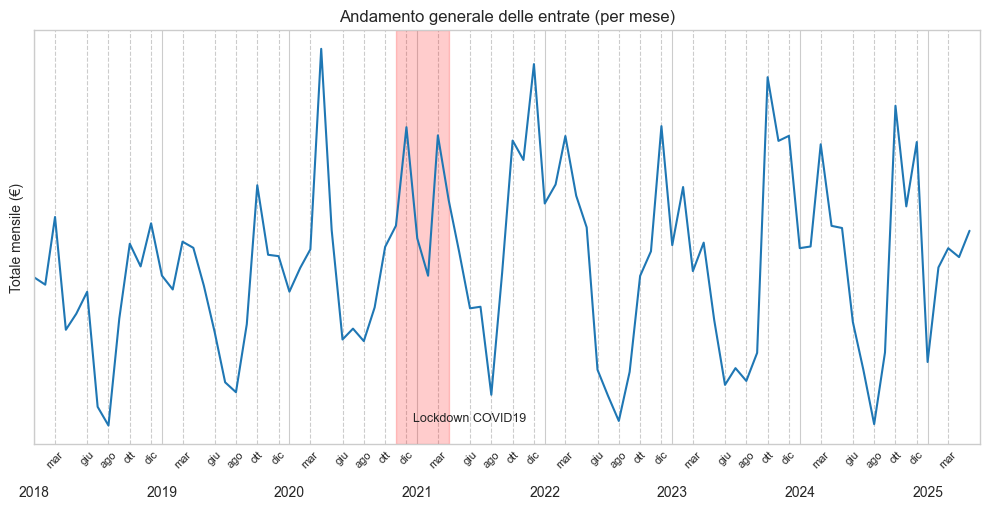

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=corr_mensile, x='Data', y='Totale mensile (€)')

# Major ticks: Anni
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Minor ticks: Mesi
# ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[3, 6, 8, 10, 12]))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))  # nomi brevi dei mesi

# Abilita minor ticks
ax.tick_params(axis='x', which='major', labelsize=10, pad=30)
ax.tick_params(axis='x', which='minor', labelsize=8, rotation=45)

# sistemo la griglia
ax.grid(which='minor', axis='x', linestyle='--')
ax.grid(False, axis='y')

# mostro il periodo covid (novembre 2020-aprile 2021)
ax.axvspan(pd.to_datetime('2020-11-1'), pd.to_datetime('2021-4-1'), color='red', alpha=0.2)
ax.text(pd.to_datetime('2021-6-1'), ax.get_ylim()[0] * 1.1, 'Lockdown COVID19', ha='center', va='bottom', fontsize='9')

ax.set_xlim(datetime(2018, 1, 1), datetime(2025, 5, 31))
ax.set_xlabel('')

ax.set_yticklabels([])  

plt.tight_layout()
ax.set_title('Andamento generale delle entrate (per mese)')
plt.show()

In [69]:
# Per sovrapporre gli anni, ricampioniamo settimanalmente
compar_anni = corrispettivi_df.resample('W').sum()
compar_anni['Totale settimanale (€)'] = compar_anni.sum(axis=1)

# compar_anni.reset_index(inplace=True)
compar_anni['Settimana'] = compar_anni.index.isocalendar().week
compar_anni['Anno'] = compar_anni.index.year
# leviamo il 2025
compar_anni = compar_anni[ compar_anni['Anno'] < 2025 ]

print('Dataset ricampionato settimanalmente')
compar_anni

Dataset ricampionato settimanalmente


Cassa 1                                           Cassa 2  \
           Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1   
Data                                                                     
2018-01-07    783.04    226.90      0.00      0.00       0.0    277.32   
2018-01-14   1798.05    322.42      0.00      0.00       0.0    403.51   
2018-01-21   1214.13    866.14      0.00      0.00       0.0    914.73   
2018-01-28   1955.48    314.61      0.00      0.00       0.0    517.64   
2018-02-04   1468.97    190.53      0.00      0.00       0.0    402.47   
...              ...       ...       ...       ...       ...       ...   
2024-12-01    973.82    677.31     96.75    178.33       0.0    324.08   
2024-12-08   1077.21    622.39    184.90    268.67       0.0    558.38   
2024-12-15   1094.06    865.68     83.85     77.40       0.0    479.25   
2024-12-22   1288.76   2072.18     98.50    134.95       0.0    536.78   
2024-12-29    577.66    595.70     34.58     18.10       0.0    494.79   

                                                     Cassa 3            \
           Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1 Reparto 2   
Data                                                                     
2018-01-07     15.06     18.08      0.00       0.0      0.00      0.00   
2018-01-14     27.21     34.06      0.00       0.0      0.00      0.00   
2018-01-21    858.89     31.30      0.00       0.0      0.00      0.00   
2018-01-28     49.01     30.50      0.00       0.0      0.00      0.00   
2018-02-04      0.00      9.75      0.00       0.0      0.00      0.00   
...              ...       ...       ...       ...       ...       ...   
2024-12-01     94.38     24.20     63.44       0.0      0.00      0.00   
2024-12-08    358.91     22.20     56.20       0.0      0.00      0.00   
2024-12-15    228.31     43.55     24.20       0.0    470.02    529.33   
2024-12-22    830.66     27.35     68.90       0.0    616.05    116.34   
2024-12-29    215.16     21.30     22.50       0.0      0.00      0.00   

                                         Totale settimanale (€) Settimana  \
           Reparto 3 Reparto 4 Reparto 5                                    
Data                                                                        
2018-01-07       0.0       0.0       0.0                1320.40         1   
2018-01-14       0.0       0.0       0.0                2585.25         2   
2018-01-21       0.0       0.0       0.0                3885.19         3   
2018-01-28       0.0       0.0       0.0                2867.24         4   
2018-02-04       0.0       0.0       0.0                2071.72         5   
...              ...       ...       ...                    ...       ...   
2024-12-01       0.0       0.0       0.0                2432.31        48   
2024-12-08       0.0       0.0       0.0                3148.86        49   
2024-12-15       0.0       0.0     147.4                4043.05        50   
2024-12-22       0.0       0.0      23.1                5813.57        51   
2024-12-29       0.0       0.0       0.0                1979.79        52   

            Anno  
                  
Data              
2018-01-07  2018  
2018-01-14  2018  
2018-01-21  2018  
2018-01-28  2018  
2018-02-04  2018  
...          ...  
2024-12-01  2024  
2024-12-08  2024  
2024-12-15  2024  
2024-12-22  2024  
2024-12-29  2024  

[365 rows x 18 columns]

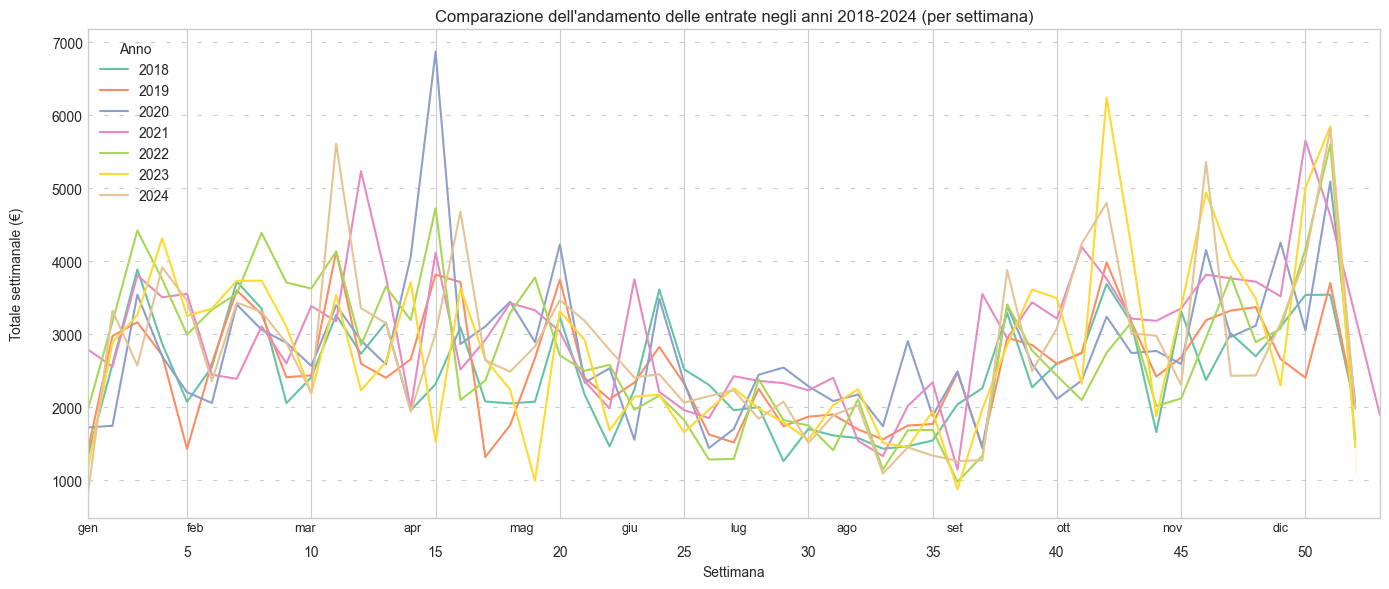

In [70]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=compar_anni, x='Settimana', y='Totale settimanale (€)', hue='Anno', palette=sns.color_palette('Set2', 7))
ax = plt.gca()

ax.set_xticks(ticks=range(0, 53, 5))
ax.tick_params(axis='x', which='major', pad=20)
# mesi come minor ticks
ax.set_xticks(np.linspace(1, 49, 12), minor=True)
ax.set_xticklabels([d.strftime('%b') for d in pd.date_range('2024-01-01', '2024-12-31', freq='MS')], minor=True, fontsize=9) # MS month start frequency
ax.set_xlim(1, 53)

ax.set_ylabel(ax.get_ylabel(), labelpad=20)

ax.grid(axis='y', linestyle=(0, (4, 10))) #(0, (3, 10, 1, 15)) means (3pt line, 10pt space, 1pt line, 15pt space) with no offset, while (5, (10, 3)), means (10pt line, 3pt space), but skip the first 5pt line

ax.set_title("Comparazione dell'andamento delle entrate negli anni 2018-2024 (per settimana)")

plt.tight_layout()
plt.show()

Con questi grafici rispondiamo alla domanda: **quali sono i mesi che vanno meglio e peggio?** Generalmente, abbiamo picchi a ottobre, dicembre e marzo (in corrispondenza delle feste, evidentemente) e cali nei mesi estivi, con agosto come mese peggiore (ma anche perché ci sono le ferie).

In [71]:
compar2425 = corrispettivi_df.copy()

compar2425['Totale giornaliero (€)'] = compar2425.sum(axis=1)
compar2425['Anno'] = compar2425.index.year
compar2425 = compar2425[ (compar2425['Anno'] >= 2024) & (compar2425.index.month <= 5) & compar2425['Totale giornaliero (€)'] > 0]
compar2425['Giorno'] = compar2425.index.day_of_year

print('Dataset per comparare giornalmente 2024 e 2025')
compar2425

Dataset per comparare giornalmente 2024 e 2025


Cassa 1                                           Cassa 2  \
           Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1   
Data                                                                     
2024-01-04    137.60     32.30      0.00      0.00     100.0    246.13   
2024-01-08    269.92     65.31     11.85    136.71       0.0      0.00   
2024-01-09    380.16     22.92     42.25      8.70       0.0    115.62   
2024-01-10    247.64     48.93     22.30     42.90       0.0      0.00   
2024-01-11    172.10     32.48      9.60      0.00       0.0    176.03   
...              ...       ...       ...       ...       ...       ...   
2025-05-26    143.50     22.91      7.90     10.00       NaN       NaN   
2025-05-27    175.62     24.12     39.70     12.80       NaN       NaN   
2025-05-28    192.96    105.57      2.80     15.00       NaN    234.64   
2025-05-29    104.84     57.62     40.00     20.00       NaN    145.00   
2025-05-31    331.05     35.70      5.10     31.00       NaN    395.83   

                                                     Cassa 3            \
           Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1 Reparto 2   
Data                                                                     
2024-01-04    112.92      0.00    159.08       0.0       NaN       0.0   
2024-01-08      0.00      0.00      0.00       0.0       NaN       0.0   
2024-01-09     33.85      1.10     35.10       0.0       NaN       0.0   
2024-01-10      0.00      0.00      0.00       0.0       NaN       0.0   
2024-01-11     18.57      9.60      9.10       0.0       NaN       0.0   
...              ...       ...       ...       ...       ...       ...   
2025-05-26       NaN       NaN       NaN       NaN       NaN       NaN   
2025-05-27       NaN       NaN       NaN       NaN       NaN       NaN   
2025-05-28     11.59     51.95       NaN       NaN       NaN       NaN   
2025-05-29     55.84     13.65     14.20       NaN       NaN       NaN   
2025-05-31     22.10     30.25     34.20       NaN       NaN       NaN   

                                         Totale giornaliero (€)  Anno Giorno  
           Reparto 3 Reparto 4 Reparto 5                                      
Data                                                                          
2024-01-04       NaN       NaN       0.0                 788.03  2024      4  
2024-01-08       NaN       NaN       0.0                 483.79  2024      8  
2024-01-09       NaN       NaN       0.0                 639.70  2024      9  
2024-01-10       NaN       NaN       0.0                 361.77  2024     10  
2024-01-11       NaN       NaN       0.0                 427.48  2024     11  
...              ...       ...       ...                    ...   ...    ...  
2025-05-26       NaN       NaN       NaN                 184.31  2025    146  
2025-05-27       NaN       NaN       NaN                 252.24  2025    147  
2025-05-28       NaN       NaN       NaN                 614.51  2025    148  
2025-05-29       NaN       NaN       NaN                 451.15  2025    149  
2025-05-31       NaN       NaN       NaN                 885.23  2025    151  

[202 rows x 18 columns]

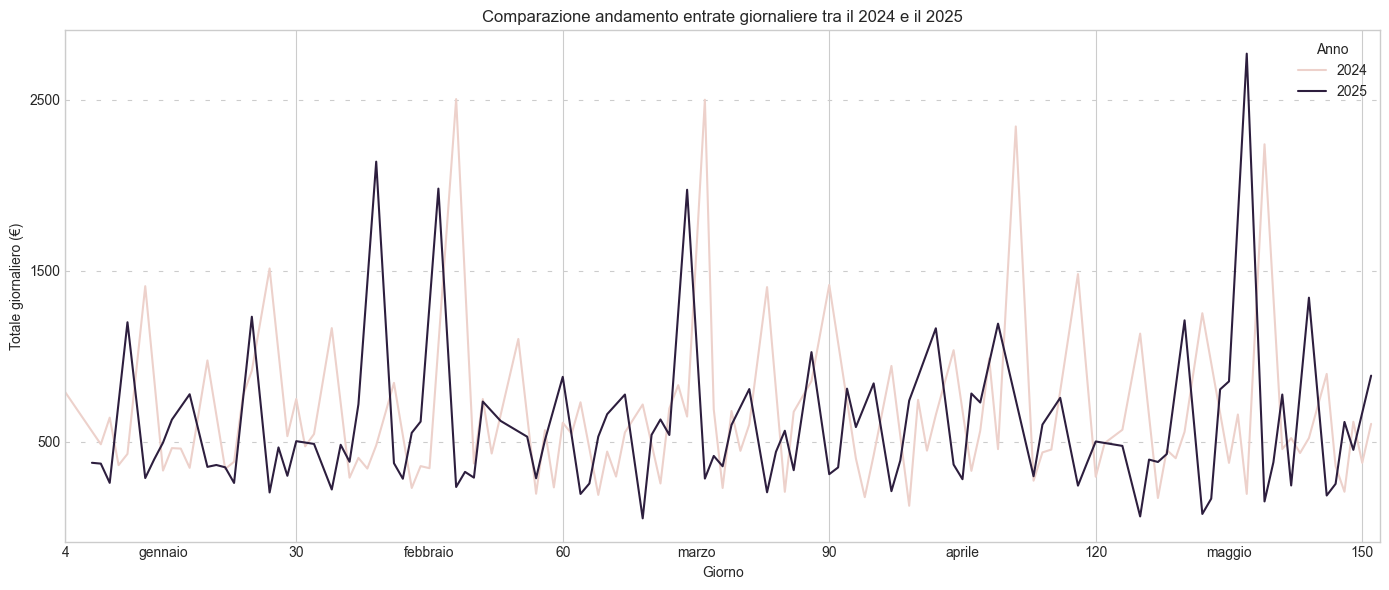

In [72]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=compar2425, x='Giorno', y='Totale giornaliero (€)', hue='Anno')

ax = plt.gca()

compar2425_xticks = [i for i in range(0, 152, 30)]
compar2425_xticks[0] = 4
ax.set_xticks(compar2425_xticks)
ax.set_xticks(range(15, 152, 30), minor=True)
ax.set_xticklabels(['gennaio', 'febbraio', 'marzo', 'aprile', 'maggio'], minor=True, fontsize=10)
ax.set_xlim(4, 152)

ax.set_yticks([500, 1500, 2500])

ax.grid(axis='y', linestyle=(0, (4, 10)))

ax.set_title('Comparazione andamento entrate giornaliere tra il 2024 e il 2025')

plt.tight_layout()
plt.show()

### Quali prodotti vanno meglio in genere?

**Problema**: Per alcuni periodi non abbiamo la separazione tra Reparto 2 e Reparto 3:
- Nel 2018 e nel 2019 la Cassa 1 batte tutto nel Reparto 2
- Nel 2021:
  - Cassa 1 da marzo a giugno batte tutto nel Reparto 2
  - Cassa 2 da aprile in poi batte tutto nel Reparto 2
- Nel 2022 la Cassa 2 torna a separare i reparti da marzo

**Soluzione**: potremmo usare i dati che abbiamo per calcolare come si distribuiscono percentualmente i due reparti negli altri anni e stimare la divisione dove i dati sono collassati, ma così praticamente staremmo manipolando i dati per confermare la nostra ipotesi. Quindi non resta che buttare via tutti i giorni in cui non abbiamo la distinzione tra i reparti

In [73]:
reparti = corrispettivi_df.copy()

reparti = reparti[
    (reparti.index.year == 2020)
    | ((reparti.index.year == 2021) & (reparti.index.month <= 2))
    | ((reparti.index.year == 2022) & (reparti.index.month >= 3))
    | (reparti.index.year >= 2023)
]

#with pd.option_context('display.max_rows', None): 
#    display(reparti)

# Calcolo i totali dei reparti
reparti_sums = reparti.sum().unstack(level=0)
reparti_sums['Totale'] = reparti_sums.sum(axis=1)
print('Totale dei reparti:')
display(reparti_sums)

# conto quanti scontrini sono stati effettivamente battuti per ciascun reparto
reparti_count = reparti.copy()
reparti_count = (reparti_count > 0).sum().unstack(level=0)
reparti_count['Count'] = reparti_count.sum(axis=1)
print('Conteggio di quanti giorni in totale un reparto compare nel corrispettivo')
display(reparti_count)

reparti_sums['Count'] = reparti_count['Count']
reparti_sums['Prodotti'] = ['Formaggi e latticini', 'Carne e insaccati', 'Yogurt', 'Gelato, dessert\n e gastronomia', 'Altro (non agricolo)']
reparti_sums['Entrata totale (%)'] = reparti_sums['Totale'] / reparti_sums['Totale'].sum() * 100
reparti_sums['Volume totale (%)'] = reparti_sums['Count'] / reparti_sums['Count'].sum() * 100

print('Dataset con i totali di entrate e conteggi')
display(reparti_sums)

reparti_sums_melted = reparti_sums.melt(id_vars='Prodotti', value_vars=['Entrata totale (%)', 'Volume totale (%)'], var_name='Tipo')
print('Stesso dataset massaggiato in forma lunga per poter plottare due serie insieme')
reparti_sums_melted

Totale dei reparti:


,Cassa 1,Cassa 2,Cassa 3,Totale
Reparto 1,243188.20,175873.84,4953.92,424015.96
Reparto 2,89269.45,46951.59,15384.09,151605.13
Reparto 3,18700.01,8681.76,22.30,27404.07
Reparto 4,20487.53,7579.02,0.00,28066.55
Reparto 5,1792.07,1003.26,1040.71,3836.04


Conteggio di quanti giorni in totale un reparto compare nel corrispettivo


,Cassa 1,Cassa 2,Cassa 3,Count
Reparto 1,1011,685,25,1721
Reparto 2,906,568,43,1517
Reparto 3,905,503,2,1410
Reparto 4,631,318,0,949
Reparto 5,24,26,18,68


Dataset con i totali di entrate e conteggi


,Cassa 1,Cassa 2,Cassa 3,Totale,Count,Prodotti,Entrata totale (%),Volume totale (%)
Reparto 1,243188.20,175873.84,4953.92,424015.96,1721,Formaggi e latticini,66.781765,30.379523
Reparto 2,89269.45,46951.59,15384.09,151605.13,1517,Carne e insaccati,23.877540,26.778464
Reparto 3,18700.01,8681.76,22.30,27404.07,1410,Yogurt,4.316093,24.889673
Reparto 4,20487.53,7579.02,0.00,28066.55,949,"Gelato, dessert\n e gastronomia",4.420432,16.751986
Reparto 5,1792.07,1003.26,1040.71,3836.04,68,Altro (non agricolo),0.604170,1.200353


Stesso dataset massaggiato in forma lunga per poter plottare due serie insieme


,Prodotti,Tipo,value
0,Formaggi e latticini,Entrata totale (%),66.781765
1,Carne e insaccati,Entrata totale (%),23.877540
2,Yogurt,Entrata totale (%),4.316093
3,"Gelato, dessert\n e gastronomia",Entrata totale (%),4.420432
4,Altro (non agricolo),Entrata totale (%),0.604170
5,Formaggi e latticini,Volume totale (%),30.379523
6,Carne e insaccati,Volume totale (%),26.778464
7,Yogurt,Volume totale (%),24.889673
8,"Gelato, dessert\n e gastronomia",Volume totale (%),16.751986
9,Altro (non agricolo),Volume totale (%),1.200353


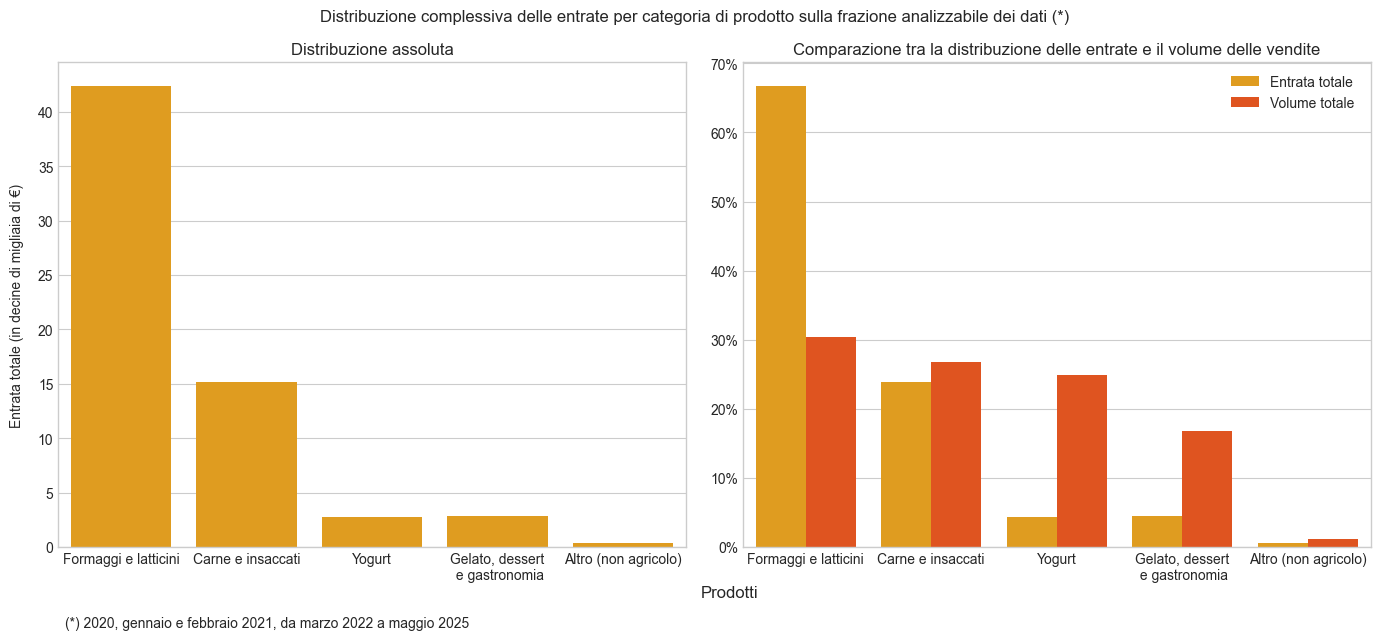

In [74]:
# mia palette custom fatta con ColorBrewer, simile ai colori dell'azienda
barplot_palette = ['orange','orangered','brown']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
abs_ax = axes[0]
n_ax = axes[1]

fig.suptitle('Distribuzione complessiva delle entrate per categoria di prodotto sulla frazione analizzabile dei dati (*)')

# assoluto
sns.barplot(data=reparti_sums, x='Prodotti', y='Totale', color=barplot_palette[0], ax=abs_ax)

abs_ax.set_ylabel('Entrata totale (in decine di migliaia di €)', labelpad=10)
abs_ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda tick, pos: f'{int(tick/10_000)}'))

abs_ax.tick_params(axis='x', labelsize=10)

abs_ax.set_title('Distribuzione assoluta')

# relativo
sns.barplot(data=reparti_sums_melted, x='Prodotti', y='value', hue='Tipo', palette={'Entrata totale (%)': barplot_palette[0], 'Volume totale (%)': barplot_palette[1]}, ax=n_ax)

n_ax.set_ylabel('')
n_ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda tick, pos: f'{int(tick)}%'))

n_ax.tick_params(axis='x', labelsize=10)

n_ax.set_title('Comparazione tra la distribuzione delle entrate e il volume delle vendite')

# tolgo il titolo e il simbolo % dalla legenda 
handles, labels = n_ax.get_legend_handles_labels()
labels = [l[:-3] for l in labels]
n_ax.legend(handles=handles, labels=labels)
sns.move_legend(n_ax, "best")

# finto asse x comune
abs_ax.set_xlabel('')
n_ax.set_xlabel('')
fig.text(0.525, 0, 'Prodotti', ha='center', fontsize=12)
fig.text(0.05, -0.05, '(*) 2020, gennaio e febbraio 2021, da marzo 2022 a maggio 2025')

fig.tight_layout()
#fig.subplots_adjust(top=0.88)
plt.show()

In [75]:
reparti = corrispettivi_df.copy()

# porto i reparti sulle righe. future_stack sostanzialmente è la nuova implementazione che non chiama dropna e sort
reparti = reparti.stack(future_stack=True).reset_index(1, names=['Data', 'Reparto'])

# teniamo solo gli anni di cui abbiamo dati completi: 2020, 2023 e 2024 e leviamo il reparto 5
reparti['Anno'] = reparti.index.year
reparti = reparti[
    (
        (reparti['Anno'] == 2020)
        | (reparti['Anno'] == 2023)
        | (reparti['Anno'] == 2024)
    ) & (
        reparti['Reparto'] != 'Reparto 5'
    )
]
print('Dataset intermedio: porto i reparti sulle righe')
display(reparti)

rep_per_anno = reparti.pivot_table(index=['Anno', 'Reparto'], aggfunc=['sum', lambda col: (col > 0).sum()])
print('Dataset intermedio ruotato con somma e conteggi')
display(rep_per_anno)

# aggreghiamo le casse, sempre portandole sulle righe
rep_per_anno = rep_per_anno.stack(future_stack=True).groupby(['Anno', 'Reparto']).sum()
tot_per_anno = rep_per_anno.groupby('Anno').sum()
rep_per_anno['Totale %'] = rep_per_anno['sum'] / tot_per_anno['sum'] * 100
rep_per_anno['Volume %'] = rep_per_anno['<lambda>'] / tot_per_anno['<lambda>'] * 100
rep_per_anno.reset_index(inplace=True)

rep_prod_map = {
    'Reparto 1': 'Formaggi e latticini',
    'Reparto 2': 'Carne e insaccati',
    'Reparto 3': 'Yogurt',
    'Reparto 4': 'Gelato, dessert\ne gastronomia'
}
rep_per_anno['Prodotto'] = rep_per_anno['Reparto'].map(rep_prod_map)


print('Dataset finale con entrate e volumi')
rep_per_anno

Dataset intermedio: porto i reparti sulle righe


,Reparto,Cassa 1,Cassa 2,Cassa 3,Anno
Data,,,,,
2020-01-01,Reparto 1,0.00,367.61,NaN,2020
2020-01-01,Reparto 2,0.00,0.00,NaN,2020
2020-01-01,Reparto 3,0.00,0.00,NaN,2020
2020-01-01,Reparto 4,NaN,NaN,NaN,2020
2020-01-02,Reparto 1,158.63,0.00,NaN,2020
...,...,...,...,...,...
2024-12-30,Reparto 4,5.00,NaN,NaN,2024
2024-12-31,Reparto 1,84.44,149.65,NaN,2024
2024-12-31,Reparto 2,105.76,80.36,NaN,2024


Dataset intermedio ruotato con somma e conteggi


sum                    <lambda>                
                 Cassa 1   Cassa 2  Cassa 3  Cassa 1 Cassa 2 Cassa 3
Anno Reparto                                                        
2020 Reparto 1  53385.28  64041.97     0.00      203     207       0
     Reparto 2  12363.31   9459.71     0.00      165     154       0
     Reparto 3   3494.94   1425.05     0.00      153     104       0
     Reparto 4   1083.04    995.86     0.00       10      37       0
2023 Reparto 1  55613.10  36204.76     6.50      235     165       1
     Reparto 2  23353.89  11471.95  2658.05      221     129       6
     Reparto 3   3946.54   2764.82     0.00      218     152       0
     Reparto 4   5144.81   1532.41     0.00      180      81       0
2024 Reparto 1  57756.47  26331.57  2736.19      248     122       9
     Reparto 2  24949.38  10634.70  6457.82      220     114      13
     Reparto 3   4938.31   1573.70    22.30      240     113       2
     Reparto 4   7789.03   3122.57     0.00      214     103       0

Dataset finale con entrate e volumi


,Anno,Reparto,sum,<lambda>,Totale %,Volume %,Prodotto
0,2020,Reparto 1,117427.25,410,80.292598,39.690223,Formaggi e latticini
1,2020,Reparto 2,21823.02,319,14.921809,30.880929,Carne e insaccati
2,2020,Reparto 3,4919.99,257,3.364115,24.878993,Yogurt
3,2020,Reparto 4,2078.90,47,1.421478,4.549855,"Gelato, dessert\ne gastronomia"
4,2023,Reparto 1,91824.36,401,64.349264,28.890490,Formaggi e latticini
5,2023,Reparto 2,37483.89,356,26.268201,25.648415,Carne e insaccati
6,2023,Reparto 3,6711.36,370,4.703230,26.657061,Yogurt
7,2023,Reparto 4,6677.22,261,4.679305,18.804035,"Gelato, dessert\ne gastronomia"
8,2024,Reparto 1,86824.23,379,59.341822,27.110157,Formaggi e latticini
9,2024,Reparto 2,42041.90,347,28.734409,24.821173,Carne e insaccati


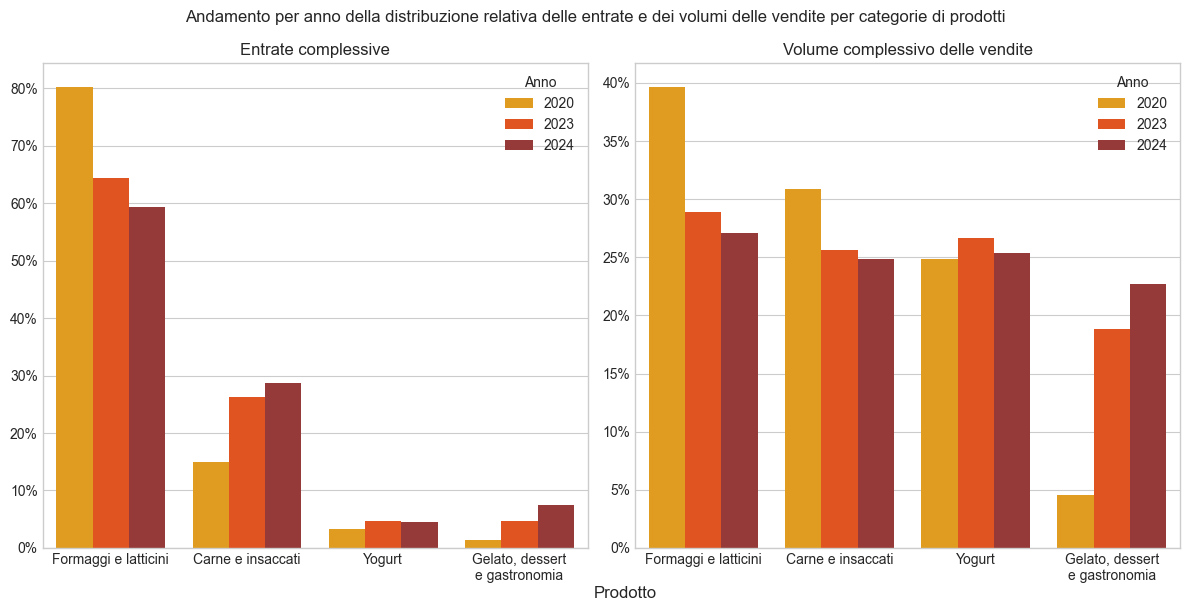

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Andamento per anno della distribuzione relativa delle entrate e dei volumi delle vendite per categorie di prodotti')
    
# entrate
ax_entrate = axes[0]
sns.barplot(rep_per_anno, x='Prodotto', y='Totale %', hue='Anno', palette=barplot_palette, ax=ax_entrate)
    
ax_entrate.set_title('Entrate complessive')

# volumi
ax_volumi = axes[1]
sns.barplot(rep_per_anno, x='Prodotto', y='Volume %', hue='Anno', palette=barplot_palette, ax=ax_volumi)

ax_volumi.set_title('Volume complessivo delle vendite')

# impostazioni comuni a entrambi i grafici
for ax in axes:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda tick, pos: f'{int(tick)}%'))
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelsize=10)
fig.text(0.525, 0, 'Prodotto', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

**Risposta**:
- i prodotti che incidono di più sulle entrate sono di gran lunga formaggi e latticini (mozzarella, burro, stracchino...)
- la carne pesa meno di quello che, intuitivamente, saremmo portati a credere, ma comunque ha un grosso peso, soprattutto ultimamente
- la tendenza negli anni vede pesare meno il formaggio e i latticini e più la carne
- lo yogurt viene venduto molto di più della gastronomia ma porta meno entrate
- negli anni la differenza tra i volumi delle vendite si è andata sempre più appiattendo

### Quali mercati vanno meglio?
L'informazione sui mercati ce l'abbiamo solo da **aprile 2024** in poi, cioè da quando si è passati a raccogliere i corrispettivi online dal Google Form. Possiamo quindi ragionare sui 13 mesi di dati.
Il dataset di riferimento cambia, non lavoriamo più con quello completo dei corrispettivi (`corrispettivi_df`) ma prendiamo i dati web importati e puliti di `web_df_clean`.

Individuiamo quali sono i mercati e dividiamo i mercati periodici (che ci interesseano) dai mercati svolti durante eventi isolati (Friuli DOC, fiere, ecc.).

I mercati periodici attualmente tenuti dal cliente sono:
- Mercato coperto (sabato, una volta al mese)
- Centro (lunedì, giovedì e sabato)
- Passons (martedì)
- Villaggio del Sole (mercoledì)
- Treppo Grande (mercoledì)
- San Osvaldo (giovedì)
- Parco del Cormor (sabato)
- Alveari (vendita online con distribuzione sul territorio)

**Problema:** il mercato del centro si teneva anche di martedì, da qualche tempo hanno rinunciato alla data

In [77]:
mercati_df = pd.read_pickle(os.path.join(DATA_DIR, 'web_clean.pickle'))
mercati = set(mercati_df['Mercato'].values)
for m in mercati:
    print(m)

SanPietro
Centro - Lunedì
Cormor - Sabato
Osoppo
San Pietro
Coperto - Sabato
Treppo
Treppo mercoledì 
Treppo Grande
Mercoledì Treppo 
S. Osvaldo - Giovedì
Villaggio - Mercoledì
Centro - Giovedì
Domenica - Oleis
Centro - Martedì
Castello 
Centro - Sabato
Passons - Martedì
San pietro
Alveari
Castello
Evento vendoglio
Villaggio
San pieri


In [78]:
# Creiamo un mapping a partire da queste entry
mercati_map = {
    'Treppo mercoledì ': 'Treppo', 
    'S. Osvaldo - Giovedì': 'S. Osvaldo',
    'Passons - Martedì': 'Passons',
    'Centro - Giovedì': 'Centro',
    'Treppo': 'Treppo',
    'Coperto - Sabato': 'Coperto',
    'Evento vendoglio': 'Eventi',
    'Treppo Grande': 'Treppo',
    'San pietro': 'Eventi',
    'Mercoledì Treppo ': 'Treppo', 
    'San Pietro': 'Eventi',
    'San pieri': 'Eventi',
    'Centro - Sabato': 'Centro',
    'Castello': 'Eventi',
    'Centro - Martedì': 'Centro',
    'Villaggio': 'Villaggio',
    'Cormor - Sabato': 'Cormor',
    'Alveari': 'Alveari',
    'Castello ': 'Eventi',
    'Domenica - Oleis': 'Eventi',
    'Villaggio - Mercoledì': 'Villaggio',
    'Osoppo': 'Eventi',
    'SanPietro': 'Eventi',
    'Centro - Lunedì': 'Centro'
}

# controlliamo che tutte le entry abbiano una corrispondenza
for k in mercati_map:
    if k not in mercati:
        print(k)
for k in mercati:
    if k not in mercati_map:
        print(k)
        
mercati_df.rename(columns={'Mercato': 'Mercato originale'}, inplace=True)
mercati_df['Mercato'] = mercati_df['Mercato originale'].map(mercati_map)
mercati_df

,Data,Cassa,Mercato originale,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Mercato
0,2024-04-02,Cassa 2,Centro - Martedì,116.90,46.00,3.30,7.23,NaN,Centro
1,2024-04-02,Cassa 1,Passons - Martedì,150.97,14.07,20.60,41.74,NaN,Passons
2,2024-04-03,Cassa 1,Villaggio - Mercoledì,108.81,15.94,17.40,32.43,NaN,Villaggio
3,2024-04-04,Cassa 1,S. Osvaldo - Giovedì,170.63,47.62,18.90,48.23,NaN,S. Osvaldo
4,2024-04-04,Cassa 2,Centro - Giovedì,115.47,NaN,7.00,11.78,NaN,Centro
...,...,...,...,...,...,...,...,...,...
456,2025-05-12,Cassa 1,Centro - Lunedì,58.38,15.00,NaN,3.00,NaN,Centro
457,2025-06-05,Cassa 2,Centro - Giovedì,121.19,37.64,7.90,13.80,NaN,Centro
458,2025-06-07,Cassa 2,Centro - Sabato,302.22,30.88,37.25,24.40,NaN,Centro
459,2025-06-10,Cassa 2,Passons - Martedì,132.22,31.57,32.40,39.70,NaN,Passons


In [79]:
# Adesso possiamo cominciare ad aggregare
mercati_df['Totale'] = mercati_df.sum(axis=1, numeric_only=True)

print('Indici sintetici delle entrate giornaliere di ciascun mercato:')
mercati_df.groupby('Mercato')['Totale'].describe()

Indici sintetici delle entrate giornaliere di ciascun mercato:


,count,mean,std,min,25%,50%,75%,max
Mercato,,,,,,,,
Alveari,1.0,25.100000,NaN,25.10,25.1000,25.100,25.1000,25.10
Centro,181.0,324.735359,186.604113,49.68,189.1300,282.820,419.0700,1147.60
Coperto,9.0,687.716667,118.870562,480.10,631.5000,674.850,759.6000,863.30
Cormor,56.0,552.053393,250.192625,205.00,382.0200,501.735,661.5350,1190.78
Eventi,12.0,578.155000,321.166789,134.56,345.9275,537.710,813.5675,1146.75
Passons,60.0,333.925333,108.608460,72.66,253.9200,352.505,395.1700,624.74
S. Osvaldo,56.0,296.966071,101.279954,154.94,222.0525,280.250,334.6750,693.22
Treppo,13.0,278.617692,99.891484,97.58,204.6800,264.230,354.1400,451.39
Villaggio,62.0,388.305161,153.379799,174.58,288.8475,362.140,436.9125,985.66


In [80]:
mercati_no_alv = mercati_df[mercati_df['Mercato'] != 'Alveari']
mercati_sintesi = mercati_no_alv.groupby('Mercato')['Totale'].describe().sort_values('std', ascending=False)
mercati_tot = mercati_df.groupby('Mercato').sum(numeric_only=True)
mercati_tot['Totale %'] = mercati_tot['Totale'] / mercati_tot['Totale'].sum() * 100
mercati_tot.sort_values('Totale', ascending=False, inplace=True)

print('Entrata totale di ciascun mercato:')
mercati_tot

Entrata totale di ciascun mercato:


,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Totale %
Mercato,,,,,,,
Centro,37279.77,15292.31,2410.58,3794.44,0.00,58777.10,35.152282
Cormor,16706.94,11143.70,969.84,2057.71,36.80,30914.99,18.489045
Villaggio,14293.72,7367.76,1068.68,1344.76,0.00,24074.92,14.398267
Passons,13859.78,2917.02,2163.51,1081.21,14.00,20035.52,11.982460
S. Osvaldo,9811.79,4427.29,1218.52,1172.50,0.00,16630.10,9.945812
Eventi,3534.14,3044.32,40.00,83.64,235.76,6937.86,4.149262
Coperto,566.05,5507.80,0.00,0.00,115.60,6189.45,3.701668
Treppo,1946.26,1402.13,147.04,126.60,0.00,3622.03,2.166194
Alveari,25.10,0.00,0.00,0.00,0.00,25.10,0.015011


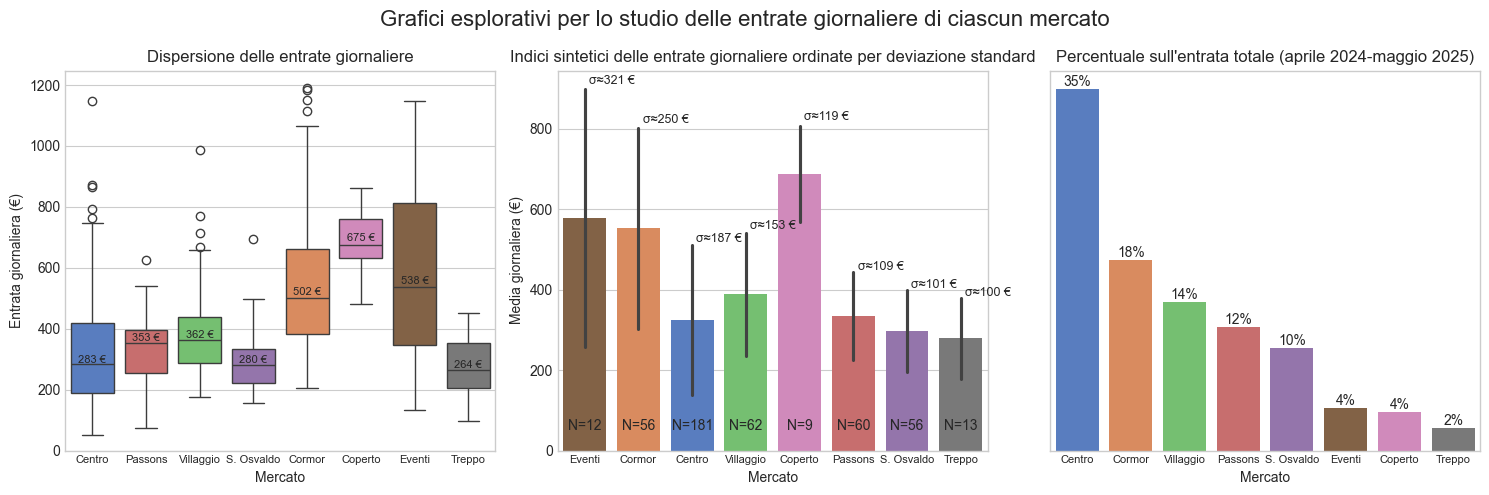

In [81]:
mercati = mercati_tot.index
mercati_palette = {key:val for key, val in zip(mercati, sns.color_palette('muted', len(mercati)))}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Grafici esplorativi per lo studio delle entrate giornaliere di ciascun mercato', fontsize=16)

# boxplot
ax_box = axes[0]
sns.boxplot(mercati_no_alv, x='Mercato', y='Totale', hue='Mercato', palette=mercati_palette, ax=ax_box)
ax_box.set_title('Dispersione delle entrate giornaliere')
ax_box.set_ylabel('Entrata giornaliera (€)')
ax_box.set_ylim(0, None)

mediane = mercati_sintesi['50%']
v_offset = mediane * 0.02
xtick_labels = [tick.get_text() for tick in ax_box.get_xticklabels()]

for i, label in enumerate(xtick_labels):
    ax_box.text(i, mediane[label] + v_offset[label], f'{mediane[label]:.0f} €', ha='center', fontsize=8)

# indici sintetici
ax_media = axes[1]
sns.barplot(mercati_no_alv, x='Mercato', y ='Totale', hue='Mercato', errorbar='sd', order=mercati_sintesi.index, palette=mercati_palette, ax= ax_media)

ax_media.set_title('Indici sintetici delle entrate giornaliere ordinate per deviazione standard')
ax_media.set_ylabel('Media giornaliera (€)')

# annoto la cardinalità e la std
for bar, count, std in zip(sorted(ax_media.patches, key=lambda x: x.get_x()), mercati_sintesi['count'], mercati_sintesi['std']):
    ax_media.annotate(f'N={count:.0f}', xy=(bar.get_x()+bar.get_width()/2, 50), ha='center')
    ax_media.annotate(f'σ≈{std:.0f} €', xy=(bar.get_x()+bar.get_width()*1.2/2, bar.get_height()*1.02 + std), ha='left', fontsize=9)

# percentuali totali
ax_tot = axes[2]
sns.barplot(mercati_tot.iloc[:-1], x='Mercato', hue='Mercato', y='Totale %', palette=mercati_palette, ax=ax_tot)
ax_tot.set_title('Percentuale sull\'entrata totale (aprile 2024-maggio 2025)')

# annoto le percentuali
bars = ax_tot.containers
labels = [f'{val:.0f}%' for val in mercati_tot['Totale %']]
labels.pop()
for container, label in zip(bars, labels):
    ax_tot.bar_label(container, labels=[label])

ax_tot.set_ylabel('')
ax_tot.grid(False)
ax_tot.tick_params(axis='y', labelleft=False)
# impostazioni comuni
for ax in axes:
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [82]:
mercati_centro = mercati_df[ mercati_df['Mercato'] == 'Centro'].copy()
mercati_centro_sintesi = mercati_centro.groupby('Mercato originale')['Totale'].describe()
print('Indici sintetici dei mercati del centro:')
display(mercati_centro_sintesi)

mercati_centro_tot = mercati_centro.groupby('Mercato originale').sum(numeric_only=True)
mercati_centro_tot['Totale %'] = mercati_centro_tot['Totale'] / mercati_centro_tot['Totale'].sum() * 100
print('Tavola riassuntiva dei totali dei mercati in centro:')
mercati_centro_tot

Indici sintetici dei mercati del centro:


,count,mean,std,min,25%,50%,75%,max
Mercato originale,,,,,,,,
Centro - Giovedì,52.0,247.935385,103.649219,49.68,177.9750,230.84,301.3525,599.15
Centro - Lunedì,54.0,235.668704,100.154369,50.65,177.9500,219.65,292.0000,488.92
Centro - Martedì,16.0,193.322500,91.765374,75.15,123.2775,164.86,246.0000,371.91
Centro - Sabato,59.0,509.579492,187.298333,156.80,393.3650,482.38,632.7700,1147.60


Tavola riassuntiva dei totali dei mercati in centro:


,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Totale %
Mercato originale,,,,,,,
Centro - Giovedì,7944.66,3848.21,468.06,631.71,0.0,12892.64,21.934801
Centro - Lunedì,7804.15,3345.81,488.32,1087.83,0.0,12726.11,21.651477
Centro - Martedì,2058.04,594.83,138.30,301.99,0.0,3093.16,5.262526
Centro - Sabato,19472.92,7503.46,1315.90,1772.91,0.0,30065.19,51.151197


/tmp/ipykernel_35340/3239778639.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([ f"{tick.get_text().split(' ')[-1]}" for tick in ax.get_xticklabels() ])
/tmp/ipykernel_35340/3239778639.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([ f"{tick.get_text().split(' ')[-1]}" for tick in ax.get_xticklabels() ])


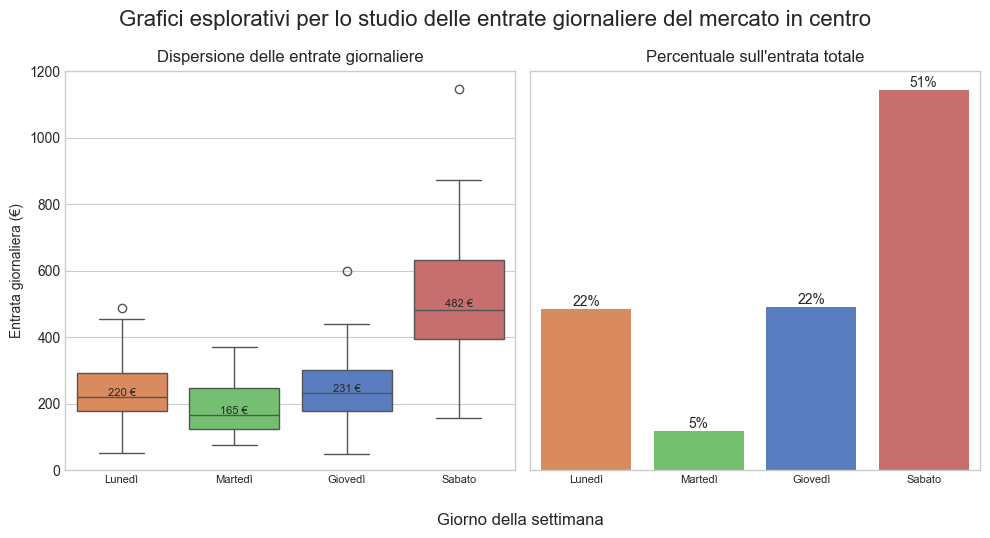

In [83]:
centro_palette = { mercato: colore for mercato, colore in zip(mercati_centro_sintesi.index, sns.color_palette('muted', len(mercati_centro_sintesi.index))) }
centro_order = ['Centro - Lunedì', 'Centro - Martedì', 'Centro - Giovedì', 'Centro - Sabato']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Grafici esplorativi per lo studio delle entrate giornaliere del mercato in centro', fontsize=16)

# boxplot
ax_box = axes[0]
sns.boxplot(mercati_centro, x='Mercato originale', y='Totale', hue='Mercato originale', order=centro_order, palette=centro_palette, ax=ax_box)
ax_box.set_title('Dispersione delle entrate giornaliere')
ax_box.set_ylabel('Entrata giornaliera (€)')
ax_box.set_ylim(0, None)

medians = mercati_centro_sintesi['50%']
vertical_offset = medians * 0.02
xtick_labels = [tick.get_text() for tick in ax_box.get_xticklabels()]

for i, label in enumerate(xtick_labels):
    ax_box.text(i, medians[label] + vertical_offset[label], f'{medians[label]:.0f} €', ha='center', fontsize=8)

# percentuali totali
ax_tot = axes[1]
sns.barplot(mercati_centro_tot, x='Mercato originale', hue='Mercato originale', y='Totale %', palette=centro_palette, order=centro_order, ax=ax_tot)
ax_tot.set_title('Percentuale sull\'entrata totale')

# annoto le percentuali
bars = ax_tot.containers
labels = [f'{val:.0f}%' for val in mercati_centro_tot['Totale %']]
for container, label in zip(bars, labels):
    ax_tot.bar_label(container, labels=[label])

ax_tot.set_ylabel('')
ax_tot.grid(False)
ax_tot.tick_params(axis='y', labelleft=False)

# impostazioni comuni
for ax in axes:
    ax.tick_params(axis='x', labelsize=8)

# impostazioni comuni a entrambi i grafici
for ax in axes:
    ax.set_xticklabels([ f"{tick.get_text().split(' ')[-1]}" for tick in ax.get_xticklabels() ])
    ax.set_xlabel('')
    #ax.tick_params(axis='x', labelsize=10)
fig.text(0.525, -0.05, 'Giorno della settimana', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [85]:
print('Range date del mercato del martedì:')
centro_martedì = mercati_centro[ mercati_centro['Mercato originale'].str.contains('Martedì')].sort_values('Data')
display(centro_martedì)
# le ultime due date sono mercati "eccezionali", l'ultima entry vera è la 116 (2024-07-16)
date_martedì

Range date del mercato del martedì:


,Data,Cassa,Mercato originale,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Mercato,Totale
0,2024-04-02,Cassa 2,Centro - Martedì,116.90,46.00,3.3,7.23,NaN,Centro,173.43
17,2024-04-09,Cassa 1,Centro - Martedì,294.25,22.06,48.8,6.80,NaN,Centro,371.91
16,2024-04-16,Cassa 2,Centro - Martedì,156.09,111.61,10.3,3.10,NaN,Centro,281.10
30,2024-04-30,Cassa 2,Centro - Martedì,101.21,75.09,2.6,NaN,NaN,Centro,178.90
37,2024-05-07,Cassa 2,Centro - Martedì,91.70,25.39,NaN,NaN,NaN,Centro,117.09
51,2024-05-21,Cassa 2,Centro - Martedì,136.19,20.10,NaN,NaN,NaN,Centro,156.29
61,2024-05-28,Cassa 2,Centro - Martedì,68.47,16.20,5.5,48.80,NaN,Centro,138.97
69,2024-06-04,Cassa 2,Centro - Martedì,186.52,4.48,22.9,20.40,NaN,Centro,234.30
77,2024-06-11,Cassa 2,Centro - Martedì,58.10,NaN,NaN,53.01,NaN,Centro,111.11
85,2024-06-18,Cassa 2,Centro - Martedì,73.06,29.79,7.4,NaN,NaN,Centro,110.25


**Quindi come aggreghiamo**:
- eliminiamo il martedì che non ci interessa più
- accorpiamo lunedì e giovedì che sono simili
- scorporiamo il sabato

Rifacciamo i grafici:

In [102]:
mercati_map2 = mercati_map.copy()
for k in mercati_map2:
    if 'Centro' in k:
        label = f"Centro ({k.split(' ')[-1][:3].lower()})"
        mercati_map2[k] = label
            
mercati2 = mercati_df.copy()
mercati2['Mercato'] = mercati2['Mercato originale'].map(mercati_map2)
mercati_periodici = mercati2[
    (mercati2['Mercato'] != 'Eventi')
    & (mercati2['Mercato'] != 'Centro (mar)')
    & (mercati2['Mercato'] != 'Alveari')
]

print('Tavola riassuntiva degli indici sintetici:')
mercati_periodici_sintesi = mercati_periodici.groupby('Mercato')['Totale'].describe()
display(mercati_periodici_sintesi)

mercati_periodici_tot = mercati_periodici.groupby('Mercato').sum(numeric_only=True).sort_values('Totale', ascending=False)
mercati_periodici_tot['Totale %'] = mercati_periodici_tot['Totale'] / mercati_periodici_tot['Totale'].sum() * 100
print('Totali mercati periodici:')
mercati_periodici_tot

Tavola riassuntiva degli indici sintetici:


,count,mean,std,min,25%,50%,75%,max
Mercato,,,,,,,,
Centro (gio),52.0,247.935385,103.649219,49.68,177.9750,230.840,301.3525,599.15
Centro (lun),54.0,235.668704,100.154369,50.65,177.9500,219.650,292.0000,488.92
Centro (sab),59.0,509.579492,187.298333,156.80,393.3650,482.380,632.7700,1147.60
Coperto,9.0,687.716667,118.870562,480.10,631.5000,674.850,759.6000,863.30
Cormor,56.0,552.053393,250.192625,205.00,382.0200,501.735,661.5350,1190.78
Passons,59.0,334.523729,109.440936,72.66,253.3600,353.730,395.4600,624.74
S. Osvaldo,56.0,296.966071,101.279954,154.94,222.0525,280.250,334.6750,693.22
Treppo,13.0,278.617692,99.891484,97.58,204.6800,264.230,354.1400,451.39
Villaggio,62.0,388.305161,153.379799,174.58,288.8475,362.140,436.9125,985.66


Totali mercati periodici:


,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Totale %
Mercato,,,,,,,
Cormor,16706.94,11143.70,969.84,2057.71,36.8,30914.99,19.709615
Centro (sab),19472.92,7503.46,1315.90,1772.91,0.0,30065.19,19.167831
Villaggio,14293.72,7367.76,1068.68,1344.76,0.0,24074.92,15.348781
Passons,13653.26,2917.02,2105.11,1047.51,14.0,19736.90,12.583109
S. Osvaldo,9811.79,4427.29,1218.52,1172.50,0.0,16630.10,10.602393
Centro (gio),7944.66,3848.21,468.06,631.71,0.0,12892.64,8.219604
Centro (lun),7804.15,3345.81,488.32,1087.83,0.0,12726.11,8.113434
Coperto,566.05,5507.80,0.00,0.00,115.6,6189.45,3.946036
Treppo,1946.26,1402.13,147.04,126.60,0.0,3622.03,2.309197


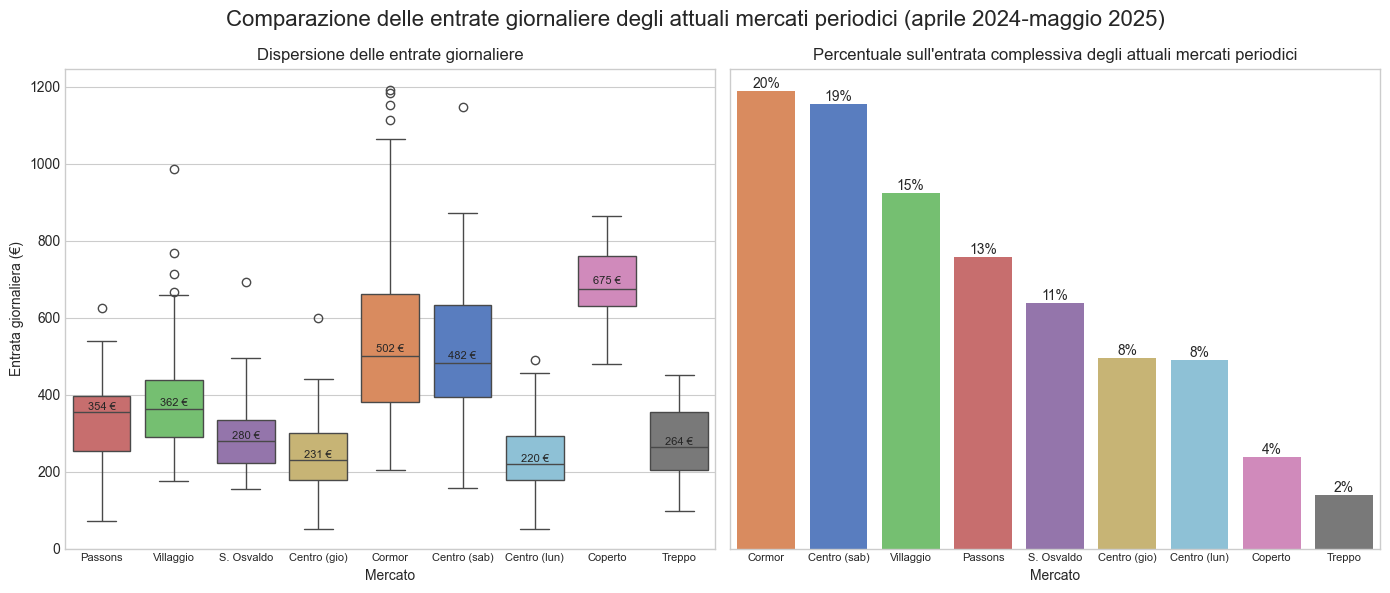

In [104]:
mercati_periodici_palette = {key:val for key,val in mercati_palette.items() if key in mercati_periodici_sintesi.index}
mercati_periodici_palette['Centro (sab)'] = mercati_palette['Centro']
mercati_periodici_palette['Centro (gio)'] = mercati_palette['Alveari']
mercati_periodici_palette['Centro (lun)'] = sns.color_palette('muted')[-1]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Comparazione delle entrate giornaliere degli attuali mercati periodici (aprile 2024-maggio 2025)', fontsize=16)

# boxplot
ax_box = axes[0]
sns.boxplot(mercati_periodici, x='Mercato', y='Totale', hue='Mercato', palette=mercati_periodici_palette, ax=ax_box)
ax_box.set_title('Dispersione delle entrate giornaliere')
ax_box.set_ylabel('Entrata giornaliera (€)')
ax_box.set_ylim(0, None)

medians = mercati_periodici_sintesi['50%']
vertical_offset = medians * 0.02
xtick_labels = [tick.get_text() for tick in ax_box.get_xticklabels()]

for i, label in enumerate(xtick_labels):
    ax_box.text(i, medians[label] + vertical_offset[label], f'{medians[label]:.0f} €', ha='center', fontsize=8)

# percentuali totali
ax_tot = axes[1]
sns.barplot(mercati_periodici_tot, x='Mercato', hue='Mercato', y='Totale %', palette=mercati_periodici_palette, ax=ax_tot)
ax_tot.set_title('Percentuale sull\'entrata complessiva degli attuali mercati periodici')

# annoto le percentuali
bars = ax_tot.containers
labels = [f'{val:.0f}%' for val in mercati_periodici_tot['Totale %']]
for container, label in zip(bars, labels):
    ax_tot.bar_label(container, labels=[label])

ax_tot.set_ylabel('')
ax_tot.grid(False)
ax_tot.tick_params(axis='y', labelleft=False)

# impostazioni comuni
for ax in axes:
    ax.tick_params(axis='x', labelsize=8)

# impostazioni comuni a entrambi i grafici
'''for ax in axes:
    ax.set_xticklabels([ f"{tick.get_text().split(' ')[-1]}" for tick in ax.get_xticklabels() ])
    ax.set_xlabel('')
    #ax.tick_params(axis='x', labelsize=10)
fig.text(0.525, -0.05, 'Giorno della settimana', ha='center', fontsize=12)'''

plt.tight_layout()
plt.show()

**Risposte**:
- il Parco del Cormor è il secondo miglior mercato (considerato anche che si fa solo il sabato) ma è anche il più scostante
- il mercato in centro, che è il mercato "stabile" e principale, è tra quello che porta di meno ed è anche scostante
- il mercato coperto è particolare perché vende solo carne e si fa solo una volta al mese, ma sembra essere il mercato che garantisce più entrate
- Treppo è un mercato giovane (cominciato a marzo 2025) quindi non è veramente comparabile agli altri

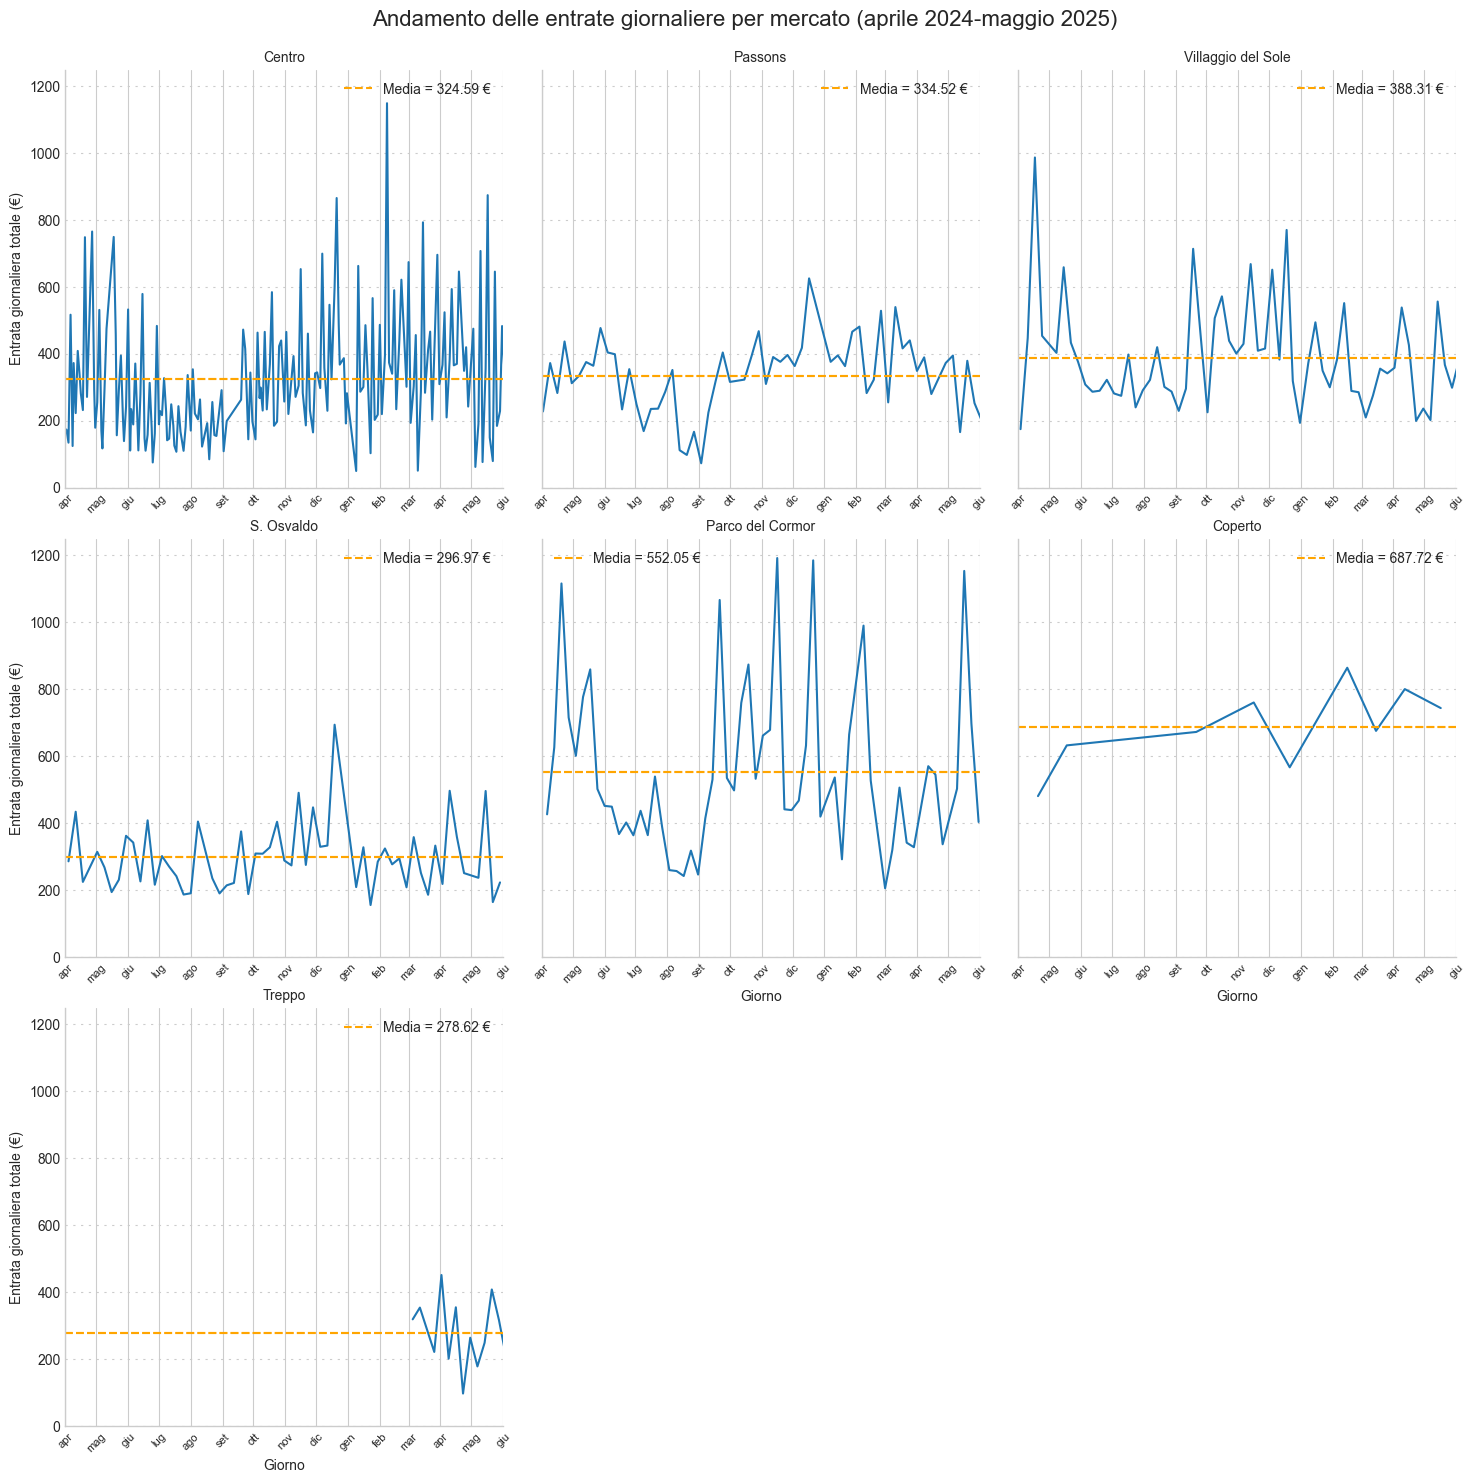

In [49]:
g = sns.relplot(mercati_periodici, kind='line', x='Data', y='Totale', col='Mercato', col_wrap=3)

def traccia_media(y, **kwargs):
    media = y.mean()
    plt.axhline(media, color=barplot_palette[0], linestyle="dashed")
    #plt.annotate(f"media: {media:.2f}", xy=(1,media), xycoords=plt.gca().get_yaxis_transform(), ha="right")
    plt.axhline(media, ls='--', color='orange', label=f'Media = {media:.2f} €')
g.map(traccia_media, 'Totale')

# sistemiamo i titoli
g.set_titles(col_template='{col_name}')
g.axes_dict['Villaggio'].set_title('Villaggio del Sole', fontsize=10)
g.axes_dict['Cormor'].set_title('Parco del Cormor', fontsize=10)

g.figure.suptitle('Andamento delle entrate giornaliere per mercato (aprile 2024-maggio 2025)', fontsize=16)
g.figure.subplots_adjust(top=0.94)

# assi
g.set_ylabels('Entrata giornaliera totale (€)')
g.set_xlabels('Giorno')
g.set(xlim=((pd.to_datetime('2024-04-1'), pd.to_datetime('2025-06-1'))), ylim=(0, None))

for ax in g.axes:
    #tick
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.tick_params(axis='x', labelsize=8, rotation=45, labelbottom=True)

    ax.legend()

    ax.grid(axis='y', linestyle=(0, (2, 5)))

#g.tight_layout()
plt.show()

**Risposte**:
- si vede chiaramente l'alta varianza del centro e del Cormor
- Il mercato di San Osvaldo sembra essere immune dall'effetto di stagionalità che invece si intravede abbastanza bene negli altri mercati

### Ci sono prodotti che vendono meglio su qualche mercato?

In [55]:
prod_merc_table = mercati_df.pivot_table(values=[col for col in mercati_df.columns if 'Reparto' in col and '5' not in col], columns='Mercato', aggfunc=['sum', 'count'])
#prod_merc_table['Prodotto'] = prod_merc_table['Reparto']['Formaggi e latticini', 'Carne e insaccati', 'Yogurt', 'Gelato, dessert e gastronomia'] * 7

print('Tavola pivot dei totali per reparto')
display(prod_merc_table)

print('Tavola massaggiata da plottare')
prod_merc_long = prod_merc_table.stack(future_stack=True).reset_index(names=['Reparto', 'Mercato'])
prod_merc_long['Prodotto'] = prod_merc_long['Reparto'].map(rep_prod_map)
prod_merc_long = prod_merc_long.melt(id_vars=['Prodotto', 'Mercato'], value_vars=['sum', 'count']).sort_values('value', ascending=False)
prod_merc_long

Tavola pivot dei totali per reparto


sum                                                   \
Mercato      Centro  Coperto    Cormor   Passons S. Osvaldo   Treppo   
Reparto 1  37283.70   796.67  16476.32  13653.26    9811.79  1946.26   
Reparto 2  15494.90  5507.80  11143.70   2917.02    4427.29  1402.13   
Reparto 3   2468.98     6.60    963.24   2105.11    1218.52   147.04   
Reparto 4   3828.14    19.20   2038.51   1047.51    1172.50   126.60   

                     count                                                     
Mercato   Villaggio Centro Coperto Cormor Passons S. Osvaldo Treppo Villaggio  
Reparto 1  14293.72    182       2     55      59         56     13        62  
Reparto 2   7367.76    170       8     55      48         49     13        57  
Reparto 3   1068.68    167       1     54      58         56     12        62  
Reparto 4   1344.76    141       1     44      48         41      6        46

Tavola massaggiata da plottare


,Prodotto,Mercato,variable,value
0,Formaggi e latticini,Centro,sum,37283.70
2,Formaggi e latticini,Cormor,sum,16476.32
7,Carne e insaccati,Centro,sum,15494.90
6,Formaggi e latticini,Villaggio,sum,14293.72
3,Formaggi e latticini,Passons,sum,13653.26
9,Carne e insaccati,Cormor,sum,11143.70
4,Formaggi e latticini,S. Osvaldo,sum,9811.79
13,Carne e insaccati,Villaggio,sum,7367.76
8,Carne e insaccati,Coperto,sum,5507.80
11,Carne e insaccati,S. Osvaldo,sum,4427.29


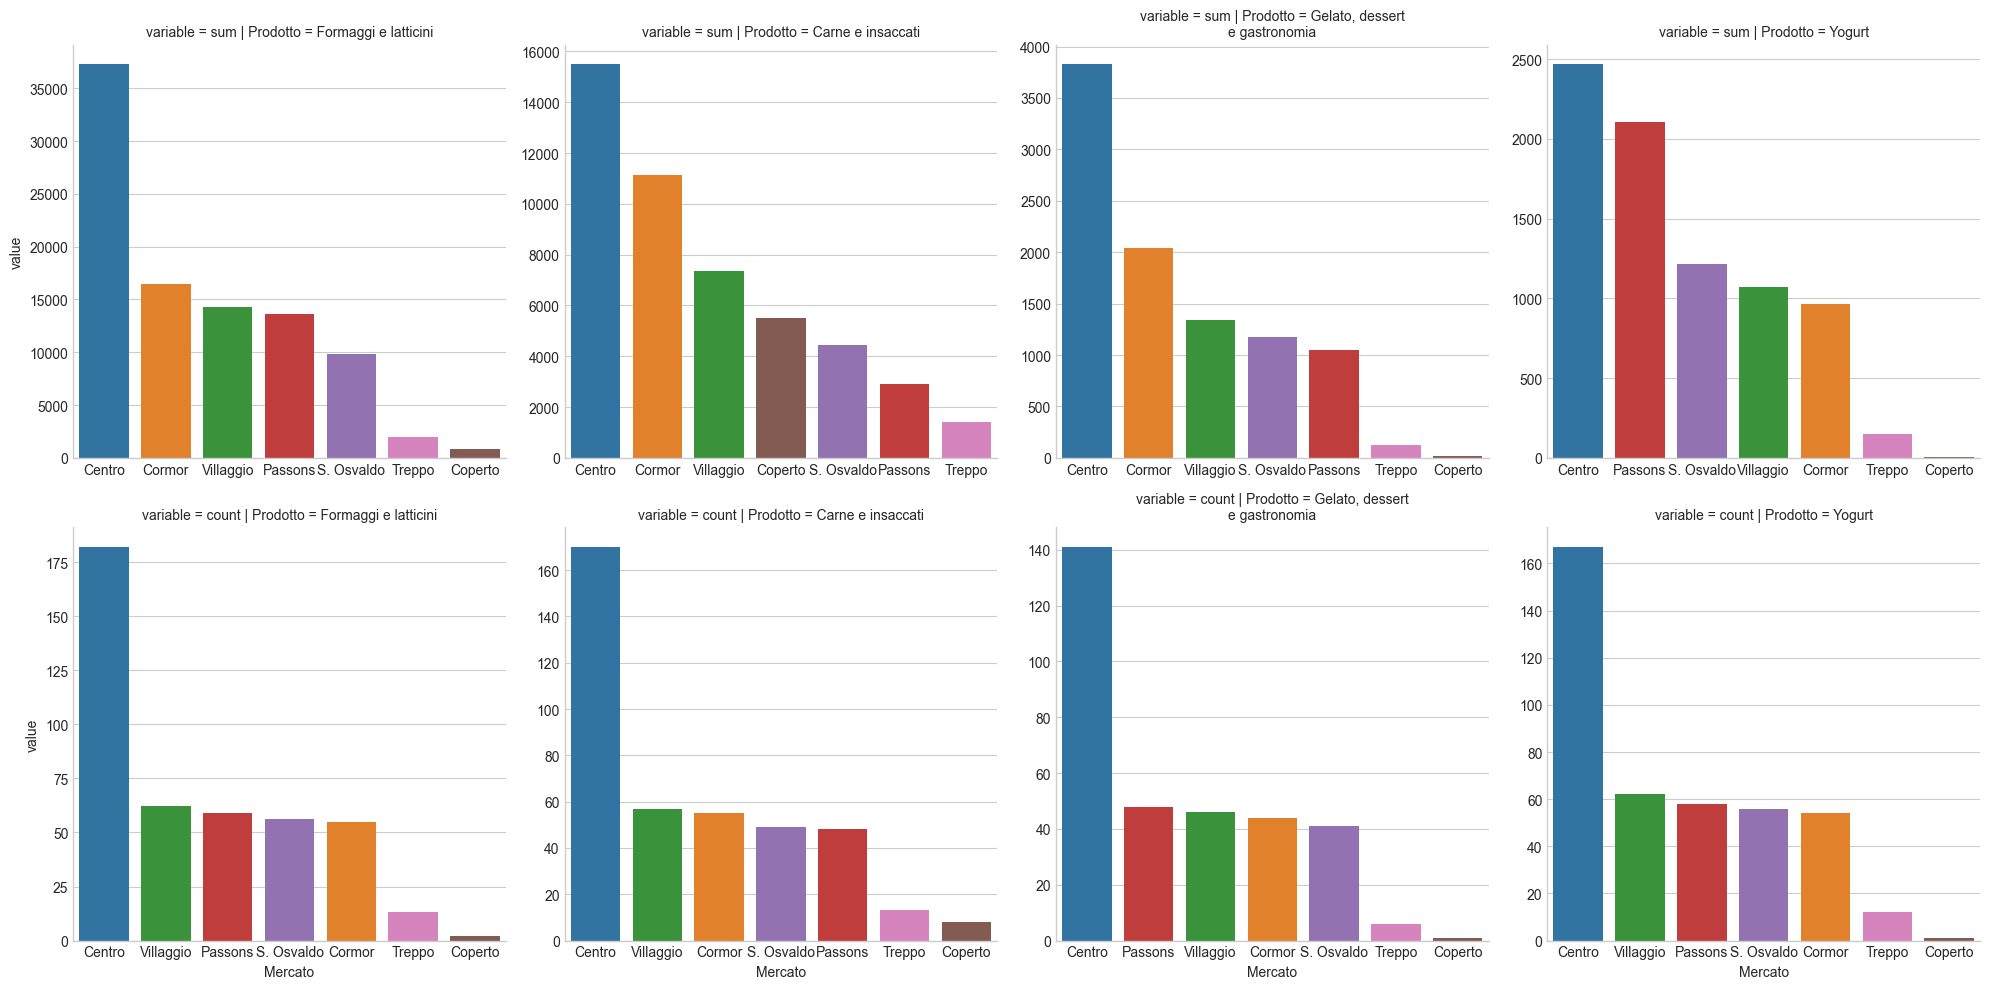

In [56]:
'''g = sns.catplot(prod_merc_long, kind='bar',
                x='Mercato', y='value', hue='Mercato', col='Prodotto',
                col_wrap=2, sharey=False, sharex=False,
                col_order=prod_merc_table['Prodotto'])'''

g = sns.catplot(prod_merc_long, kind='bar',
                x='Mercato', y='value', hue='Mercato', col='Prodotto', row='variable',
                sharey=False, sharex=False)